In [1]:
#掛載Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##輸出高畫質圖型

%config InlineBackend.figure_format='retina'

%matplotlib inline

##匯入要使用的套件

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno

import altair as alt

from statsmodels.graphics.mosaicplot import mosaic

from scipy.stats import chi2_contingency

import plotly.express as px

from pandas.plotting import parallel_coordinates

import wordcloud

import networkx as nx

from networkx.drawing.nx_agraph import graphviz_layout

from scipy.spatial import distance

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

#from missingpy import MissForest

##忽略提醒

import warnings

warnings.filterwarnings ("ignore")


In [6]:
##在桌機顯示中文

#import matplotlib

#matplotlib.rcParams['axes.unicode_minus']=False

#import seaborn as sns

#sns.set(font= "Microsoft YaHei", style="ticks", font_scale=1.4)

##在Colab顯示中文

# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
plt.style.use('seaborn')

# 加入字型
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-09-15 03:00:31--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.62.101, 172.253.62.139, 172.253.62.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-15 03:00:31--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-09-15 03:00:

In [7]:
#記得先上傳csv檔案至工作區再讀入，或者使用網路路徑指明檔案位置
Iris=pd.read_csv('Iris.csv')

#去除目標變數
Iris2=Iris.drop(["Id","Species"],axis=1)

#檢查前五筆資料
print(Iris2.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


# **資料描述統計**

In [8]:
#平均值

print("平均值:\n",Iris2.mean())

##中位數

print("中位數:\n",Iris2.median())

##眾數

print("眾數:\n",Iris2.mode())

平均值:
 SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64
中位數:
 SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64
眾數:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.0           3.0            1.5           0.2


In [9]:
#極差

print("極差:\n",Iris2.max() - Iris2.min())

##分位數

print("分位數:\n", Iris2.quantile(q=[0,0.25,0.5,0.75,1]))

##方差

print("方差:\n", Iris2.var())

#標準差

print("標準差:\n", Iris2.std())

##變異係數

print("變異係數:\n", Iris2.mean() / Iris2.std())



極差:
 SepalLengthCm    3.6
SepalWidthCm     2.4
PetalLengthCm    5.9
PetalWidthCm     2.4
dtype: float64
分位數:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0.00            4.3           2.0           1.00           0.1
0.25            5.1           2.8           1.60           0.3
0.50            5.8           3.0           4.35           1.3
0.75            6.4           3.3           5.10           1.8
1.00            7.9           4.4           6.90           2.5
方差:
 SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64
標準差:
 SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64
變異係數:
 SepalLengthCm    7.056602
SepalWidthCm     7.043450
PetalLengthCm    2.130256
PetalWidthCm     1.570661
dtype: float64


In [10]:
#偏度
print("偏度:\n", Iris2.skew())

##峰度

print("峰度:\n", Iris2.kurtosis())


偏度:
 SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64
峰度:
 SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64


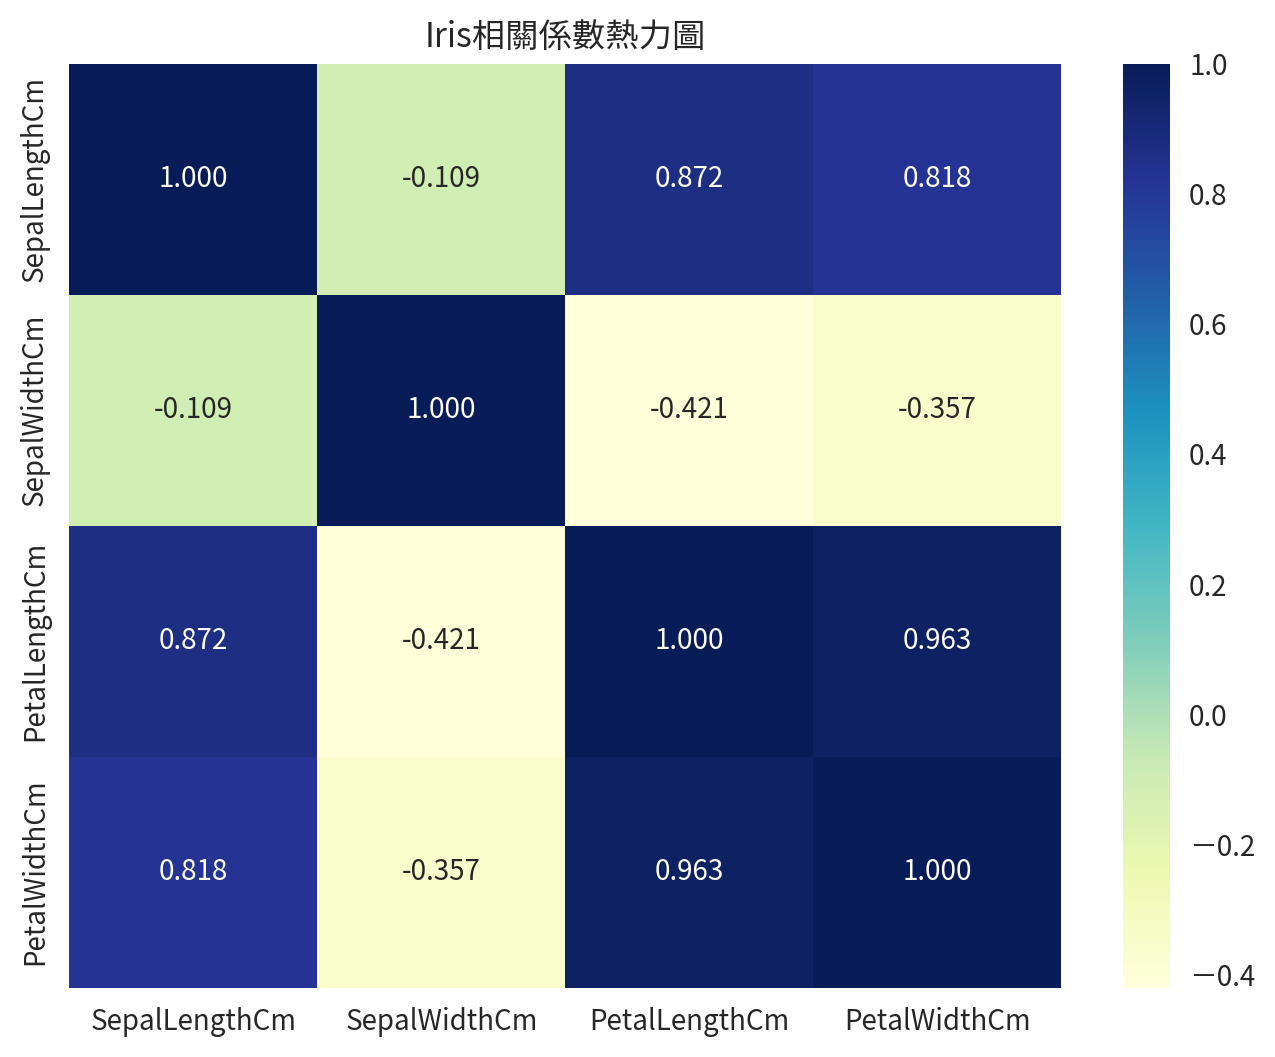

In [11]:
# 相關係數

iriscorr=Iris2.corr(method="pearson")

## 使用熱力圖型視覺化

plt.figure(figsize=(8,6))

ax=sns.heatmap(iriscorr, fmt=".3f", annot=True, cmap="YlGnBu")

## y軸標籤置中

ax.set_yticklabels(iriscorr.index.values,va="center")

plt.title("Iris相關係數熱力圖")

plt.show()


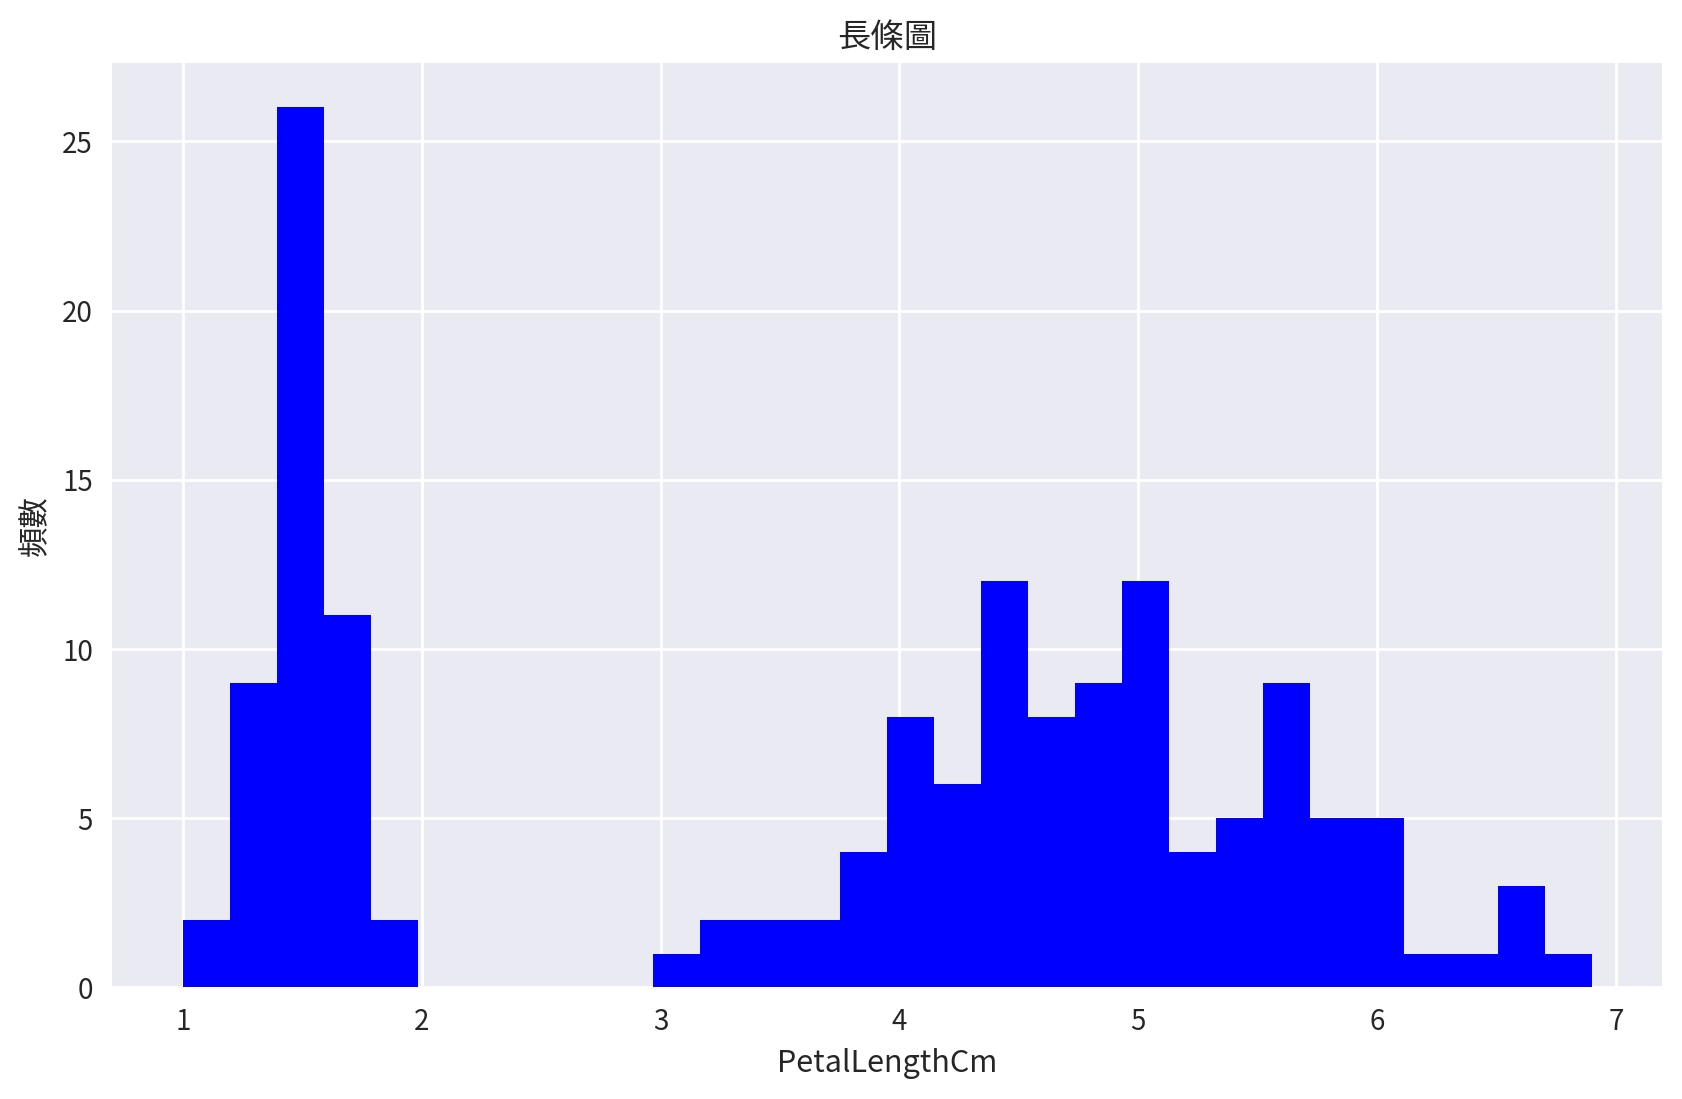

In [12]:
# 數值變數長條圖視覺化

plt.figure(figsize=(10,6))

plt.hist(Iris2.PetalLengthCm, bins=30, color="blue")

plt.xlabel("PetalLengthCm")

plt.ylabel("頻數")

plt.title("長條圖")

plt.show()

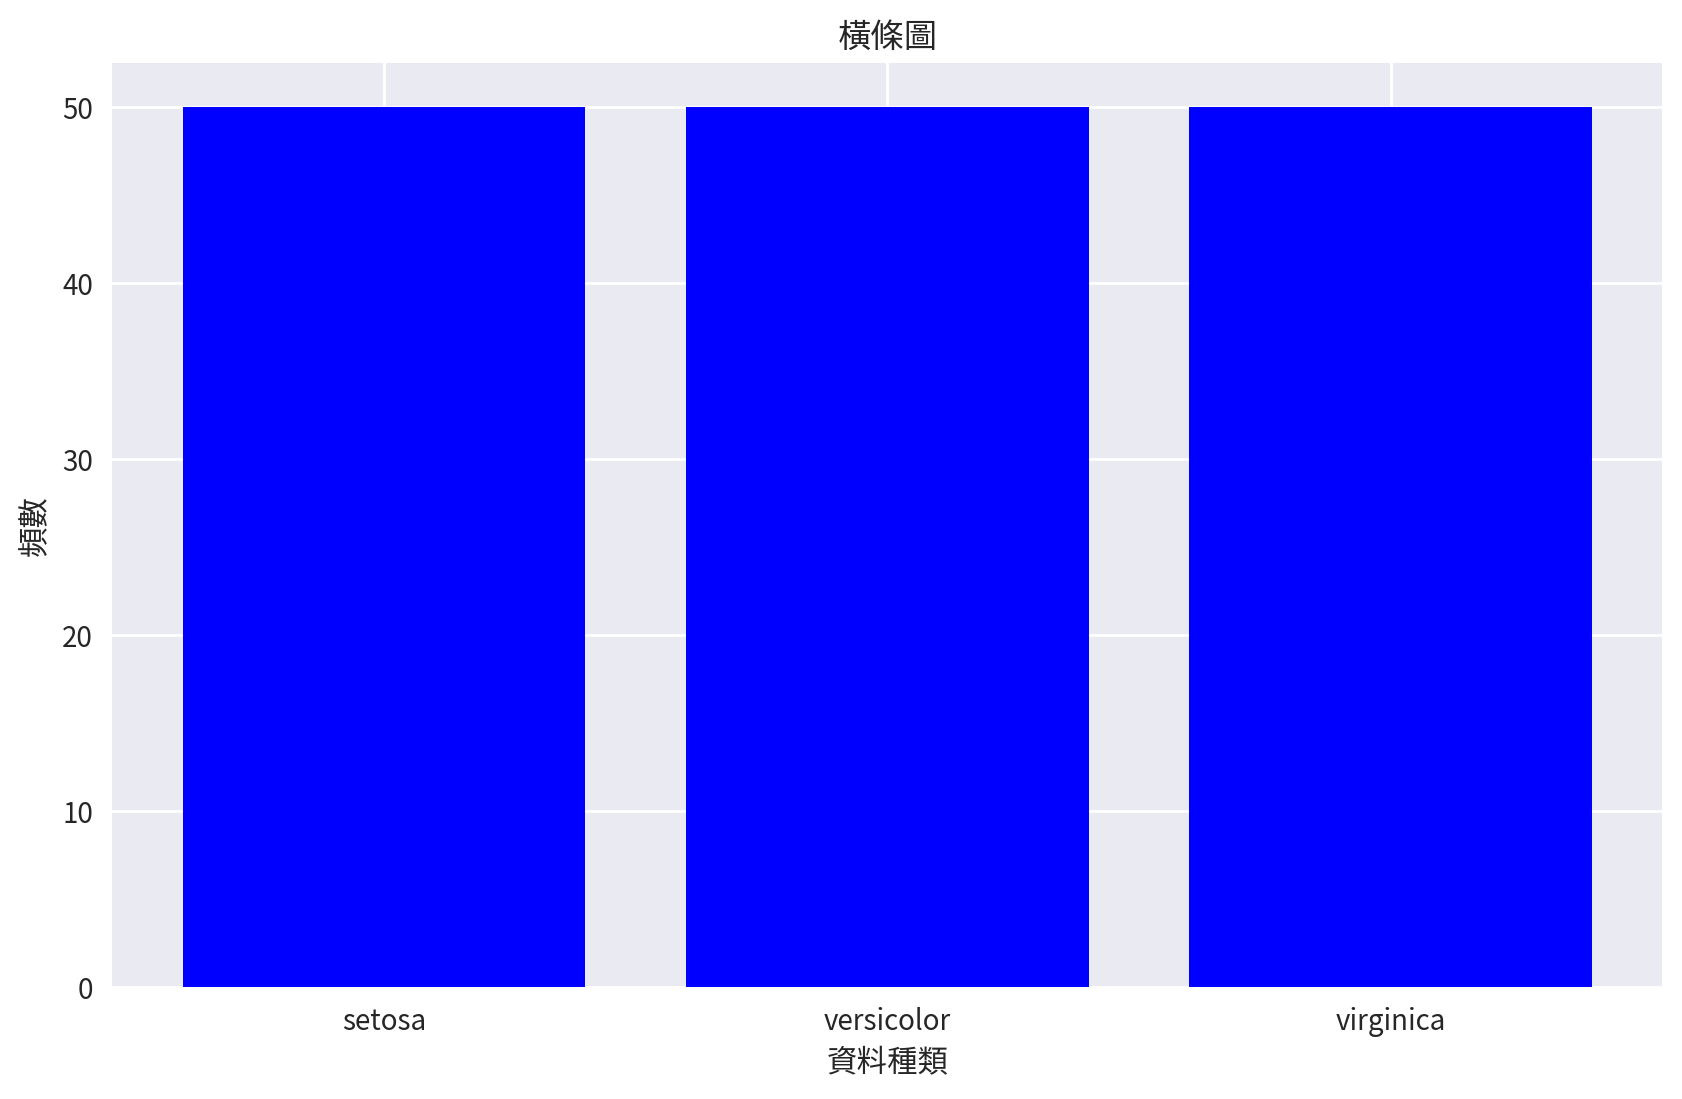

In [13]:
## 分類變數條形圖型視覺化

plotdata=Iris.Species.value_counts()

plt.figure(figsize=(10,6))

plt.bar(x=plotdata.index.values, height=plotdata.values,color="blue")

plt.xlabel("資料種類")

plt.ylabel("頻數")

plt.title("橫條圖")

plt.show()


## **觀察連續變數間的關係**

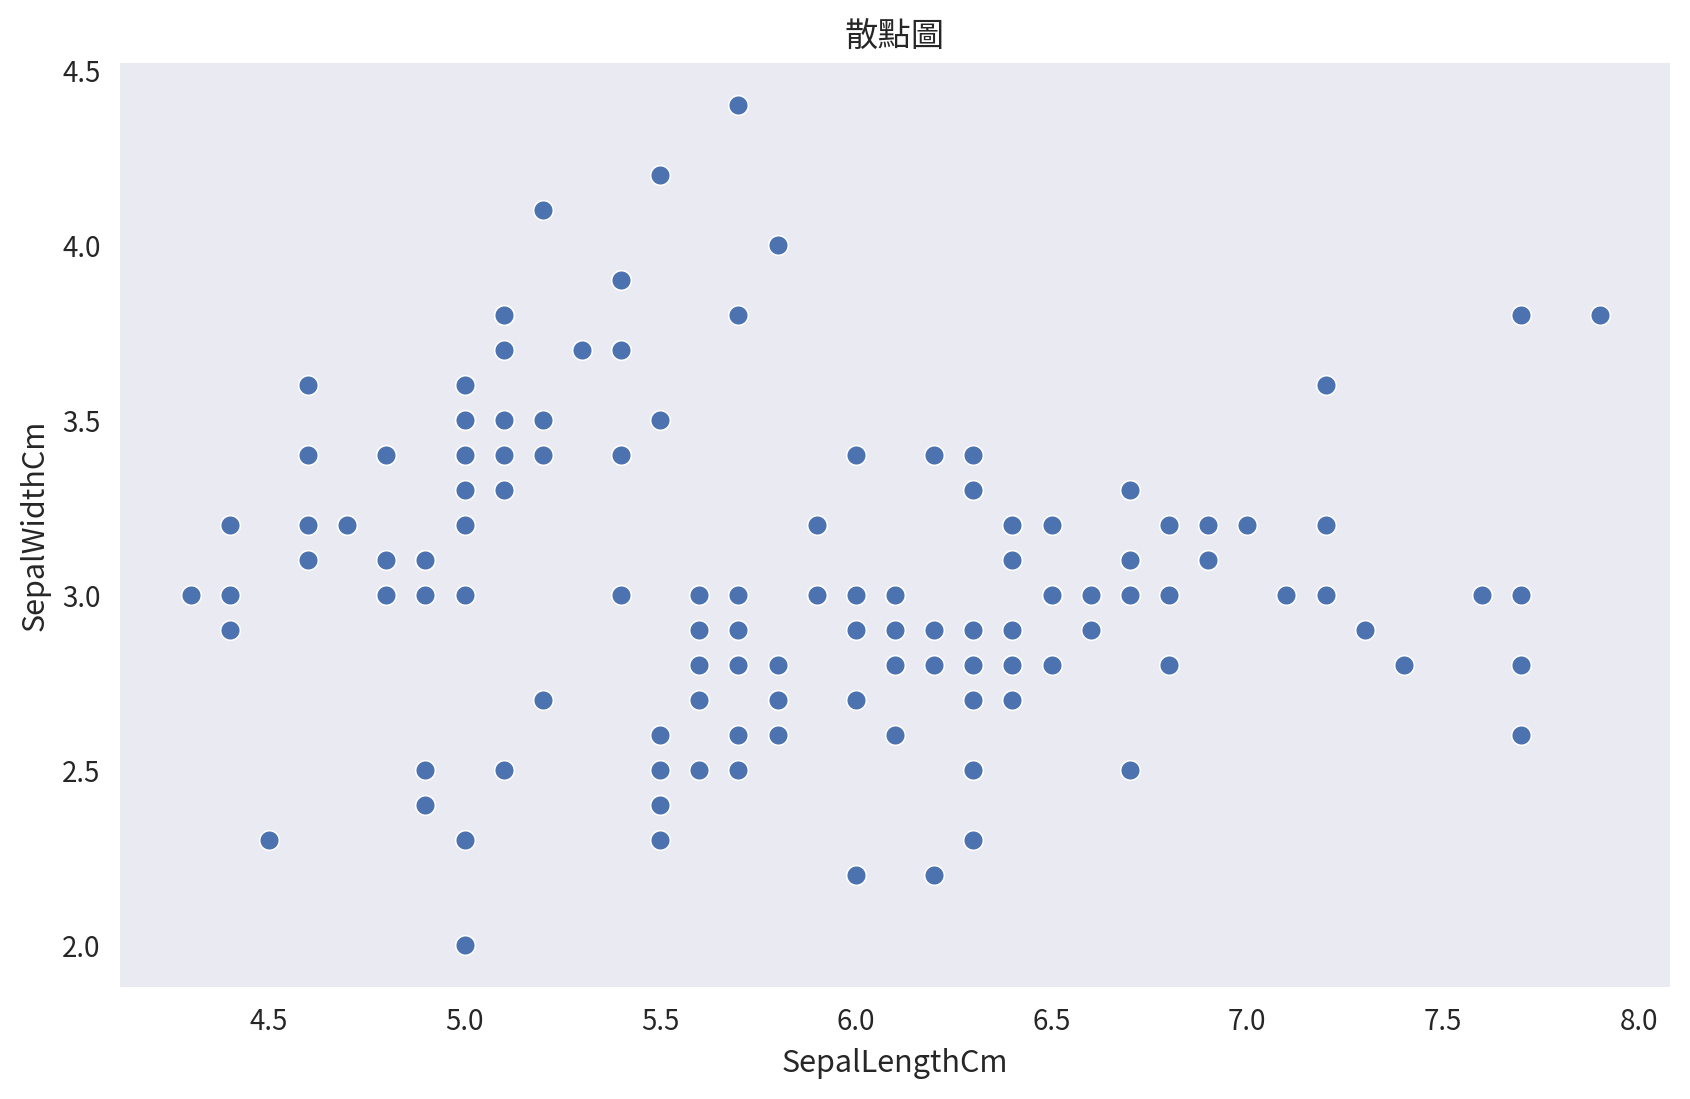

In [14]:
#散點圖

plt.figure(figsize=(10,6))

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=Iris2, s=50)

plt.title("散點圖")

plt.grid()

plt.show()


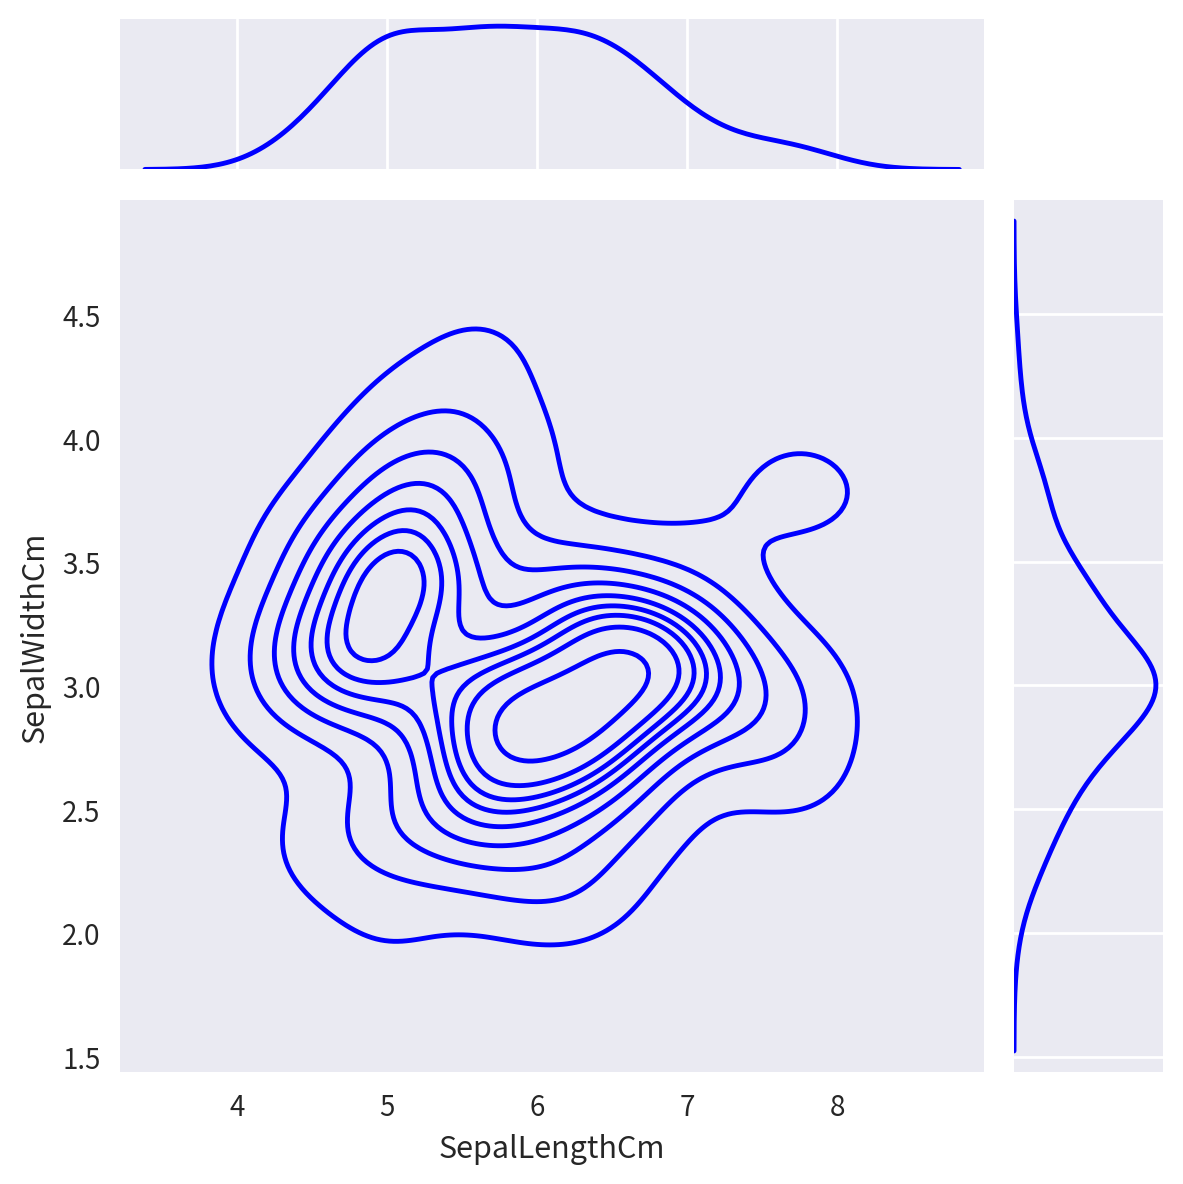

In [15]:
## 2D密度曲線

sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=Iris2, kind="kde", color="blue")

plt.grid()

plt.show()


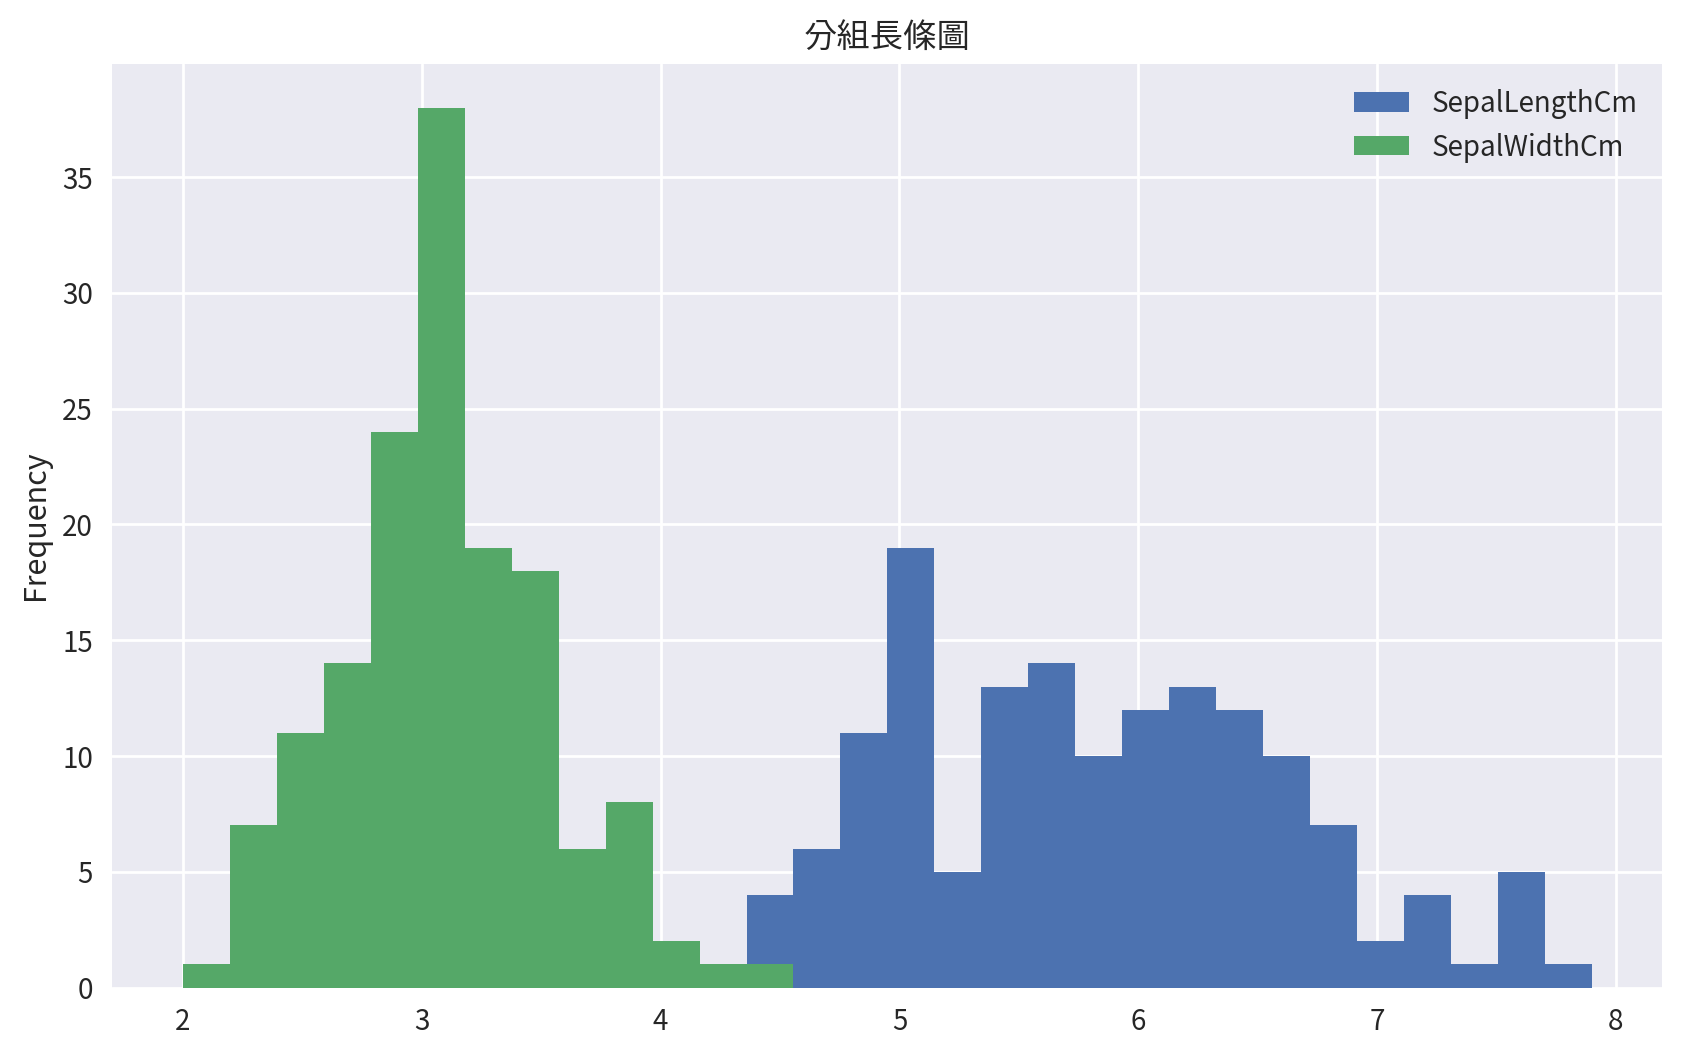

In [21]:
#長條圖

Iris2.iloc[:,0:2].plot(kind="hist", bins=30, figsize=(10,6))

plt.title("分組長條圖")

plt.show()



## **觀察多個連續變數的關係**

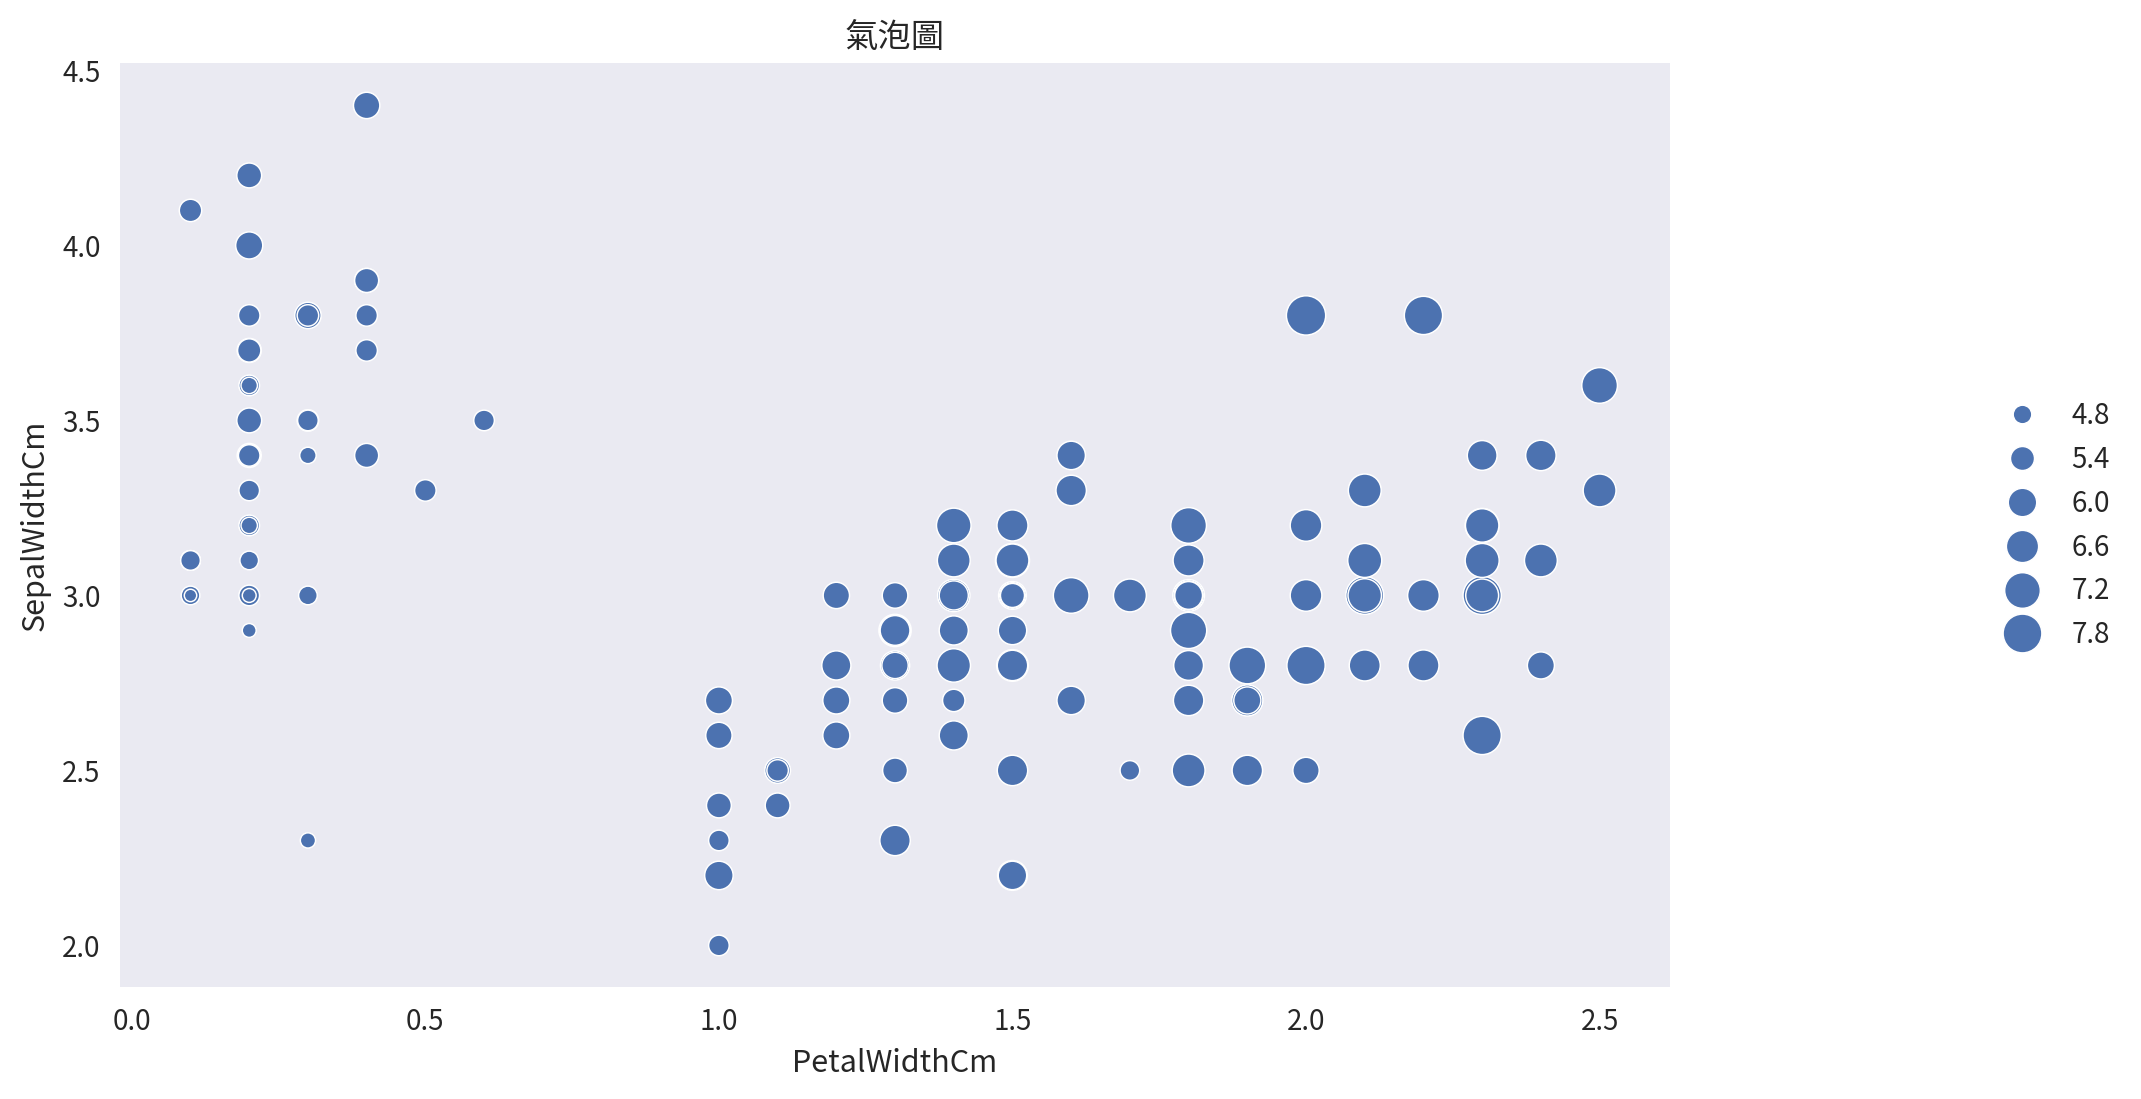

In [22]:
# 氣泡圖

plt.figure(figsize=(10,6))

sns.scatterplot(x="PetalWidthCm",y="SepalWidthCm", data=Iris2, size="SepalLengthCm", sizes=(20, 200), palette="muted")

plt.title("氣泡圖")

plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))

plt.grid()

plt.show()


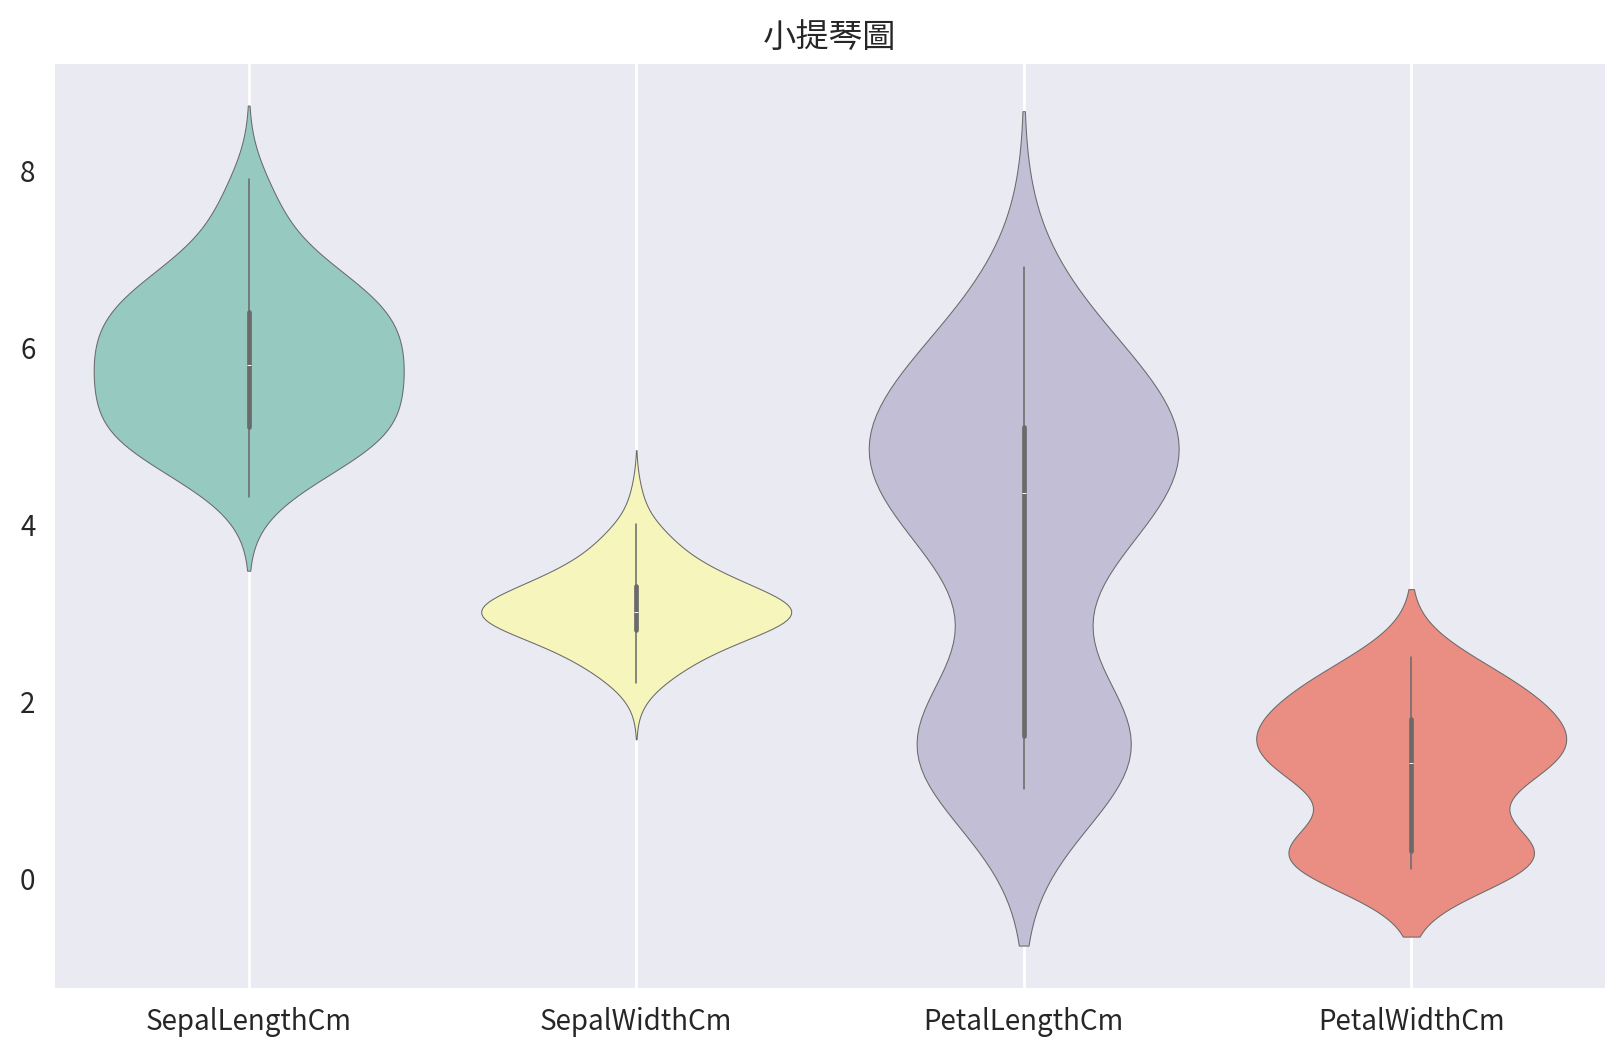

In [23]:
## 小提琴圖型

plt.figure(figsize=(10,6))

sns.violinplot(data=Iris2.iloc[:, 0:4], palette="Set3", bw=0.5)

plt.title("小提琴圖")

plt.grid()

plt.show()


In [24]:
#蒸汽圖
#將鳶尾花寬資料轉化為長資料

Irislong=Iris.melt(["Id", "Species"], var_name="Measurement_type", value_name="value")

Irislong.head()

alt.Chart(Irislong).mark_area().encode(

    alt.X("Id:Q"), ##X軸

    alt.Y("value:Q", stack="center", axis=None),  ##Y軸

    alt.Color("Measurement_type:N"), ##設定顏色

).properties(width=500,height=300) #設定圖形大小


   Id Species Measurement_type  value
0   1  setosa    SepalLengthCm    5.1
1   2  setosa    SepalLengthCm    4.9
2   3  setosa    SepalLengthCm    4.7
3   4  setosa    SepalLengthCm    4.6
4   5  setosa    SepalLengthCm    5.0


alt.Chart(...)

# **鐵達尼號資料集**

In [28]:
## 讀取使用的資料
Titanic=pd.read_csv("Titanic train.csv")
Titanic.head()


PassengerId  Survived  Pclass  \
0            2         1       1   
1           10         1       2   
2           20         1       3   
3           27         0       3   
4           31         0       1   

                                                Name     Sex   Age  SibSp  \
0  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
2                            Masselmani, Mrs. Fatima  female   NaN      0   
3                            Emir, Mr. Farred Chehab    male   NaN      0   
4                           Uruchurtu, Don. Manuel E    male  40.0      0   

   Parch    Ticket     Fare Cabin Embarked  
0      0  PC 17599  71.2833   C85        C  
1      0    237736  30.0708   NaN        C  
2      0      2649   7.2250   NaN        C  
3      0      2631   7.2250   NaN        C  
4      0  PC 17601  27.7208   NaN        C

## **觀察兩個分類變數的關係**

In [29]:
#卡方檢定

tab=pd.crosstab(Titanic["Embarked"], Titanic ["Survived"])

print(tab)

c,p,_,_=chi2_contingency(tab.values)

print("卡方值:", c, "; P value: ",p)

# reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html


Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
卡方值: 25.964452881874784 ; P value:  2.3008626481449577e-06


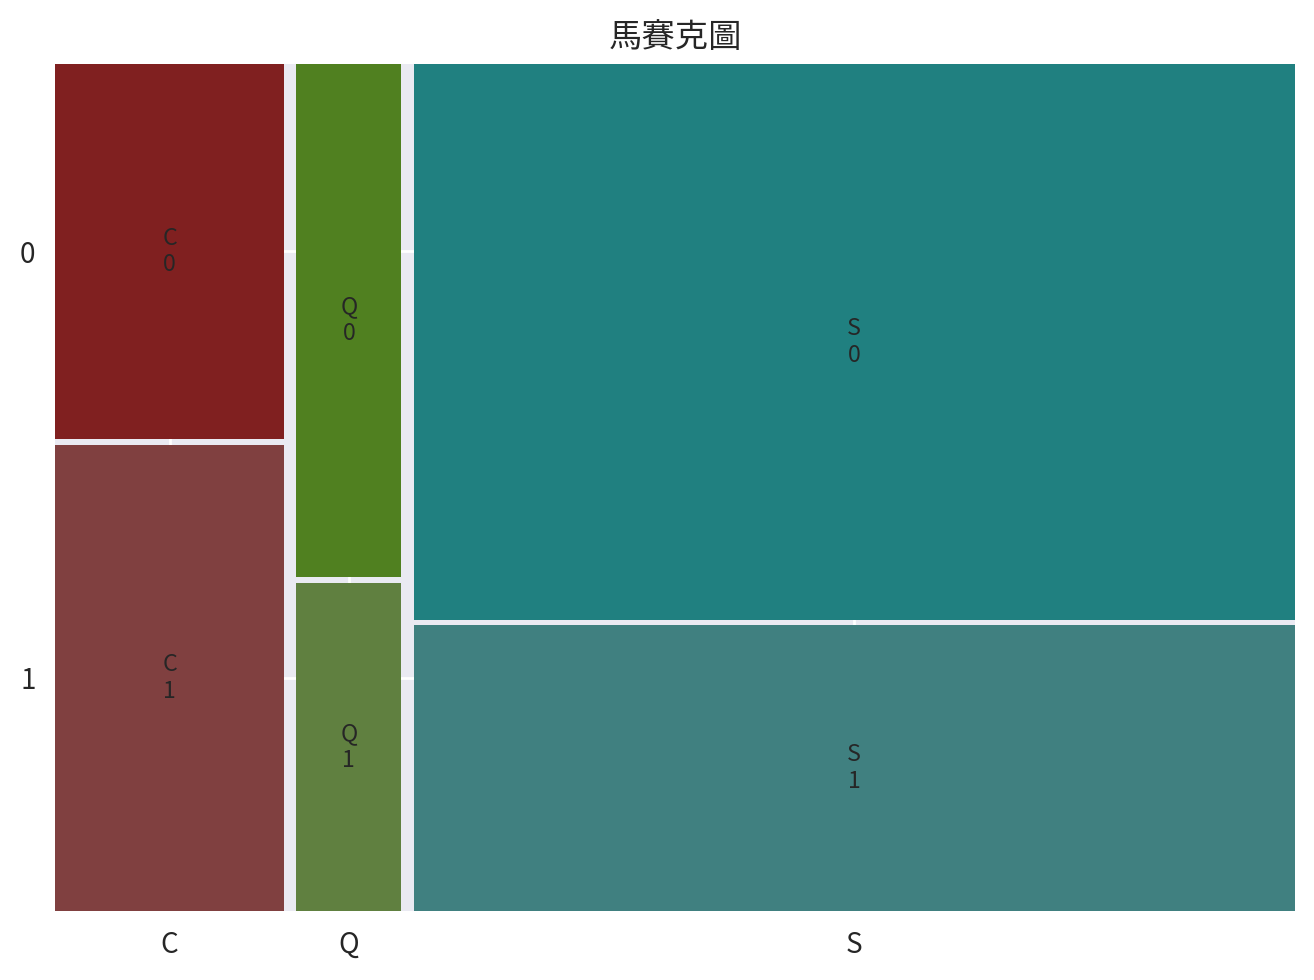

In [30]:
##馬賽克圖

mosaic (Titanic, ["Embarked", "Survived"], gap=0.01, title="馬賽克圖")

plt.show()



## **觀察多個分類變數的關係**

In [31]:
##樹圖

Titanic["Titanic"]="Titanic" ##增加一個統一的根

Titanic["value"]=1 ##增加一個用於計數的變數

fig=px.treemap(Titanic, path=["Titanic", "Survived", "Sex","Embarked"],
               values="value", color="Fare",
               color_continuous_scale='RdBu',
               width=800, height=500,)

fig.show()


## **分類變數和連續變數的關係，一分類一連續**

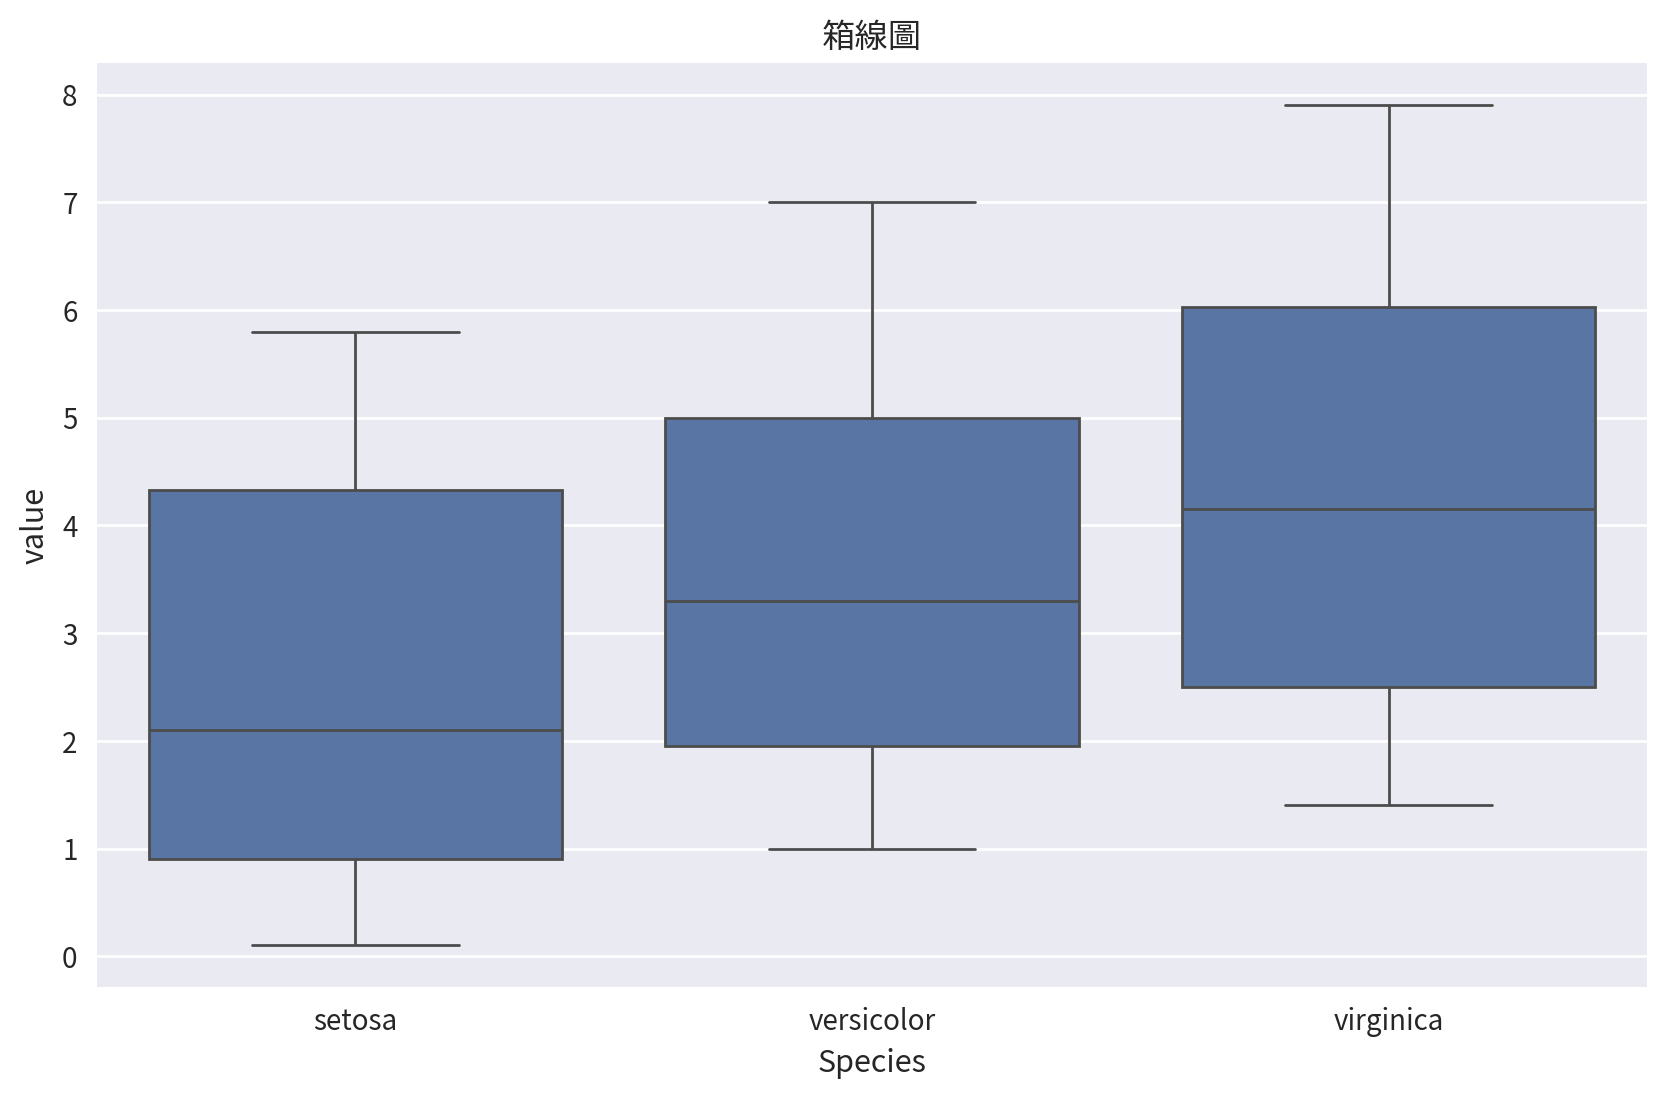

In [32]:
## 分組箱線圖

plt.figure(figsize=(10,6))

sns.boxplot(data=Irislong, x="Species", y="value")

plt.title("箱線圖")

plt.show()


In [33]:
## 分面密度曲線查看資料的分佈

alt.Chart(Irislong).transform_density(

    density="value", bandwidth=0.3,

    groupby=["Measurement_type"], extent= [0, 8]

).mark_area().encode(

    alt.X("value:Q"), alt.Y("density:Q"),

    alt.Row("Measurement_type:N")

).properties (width=500, height=80)  # 設定圖形大小


alt.Chart(...)

## **分類變數和連續變數的關係，二分類一連續**

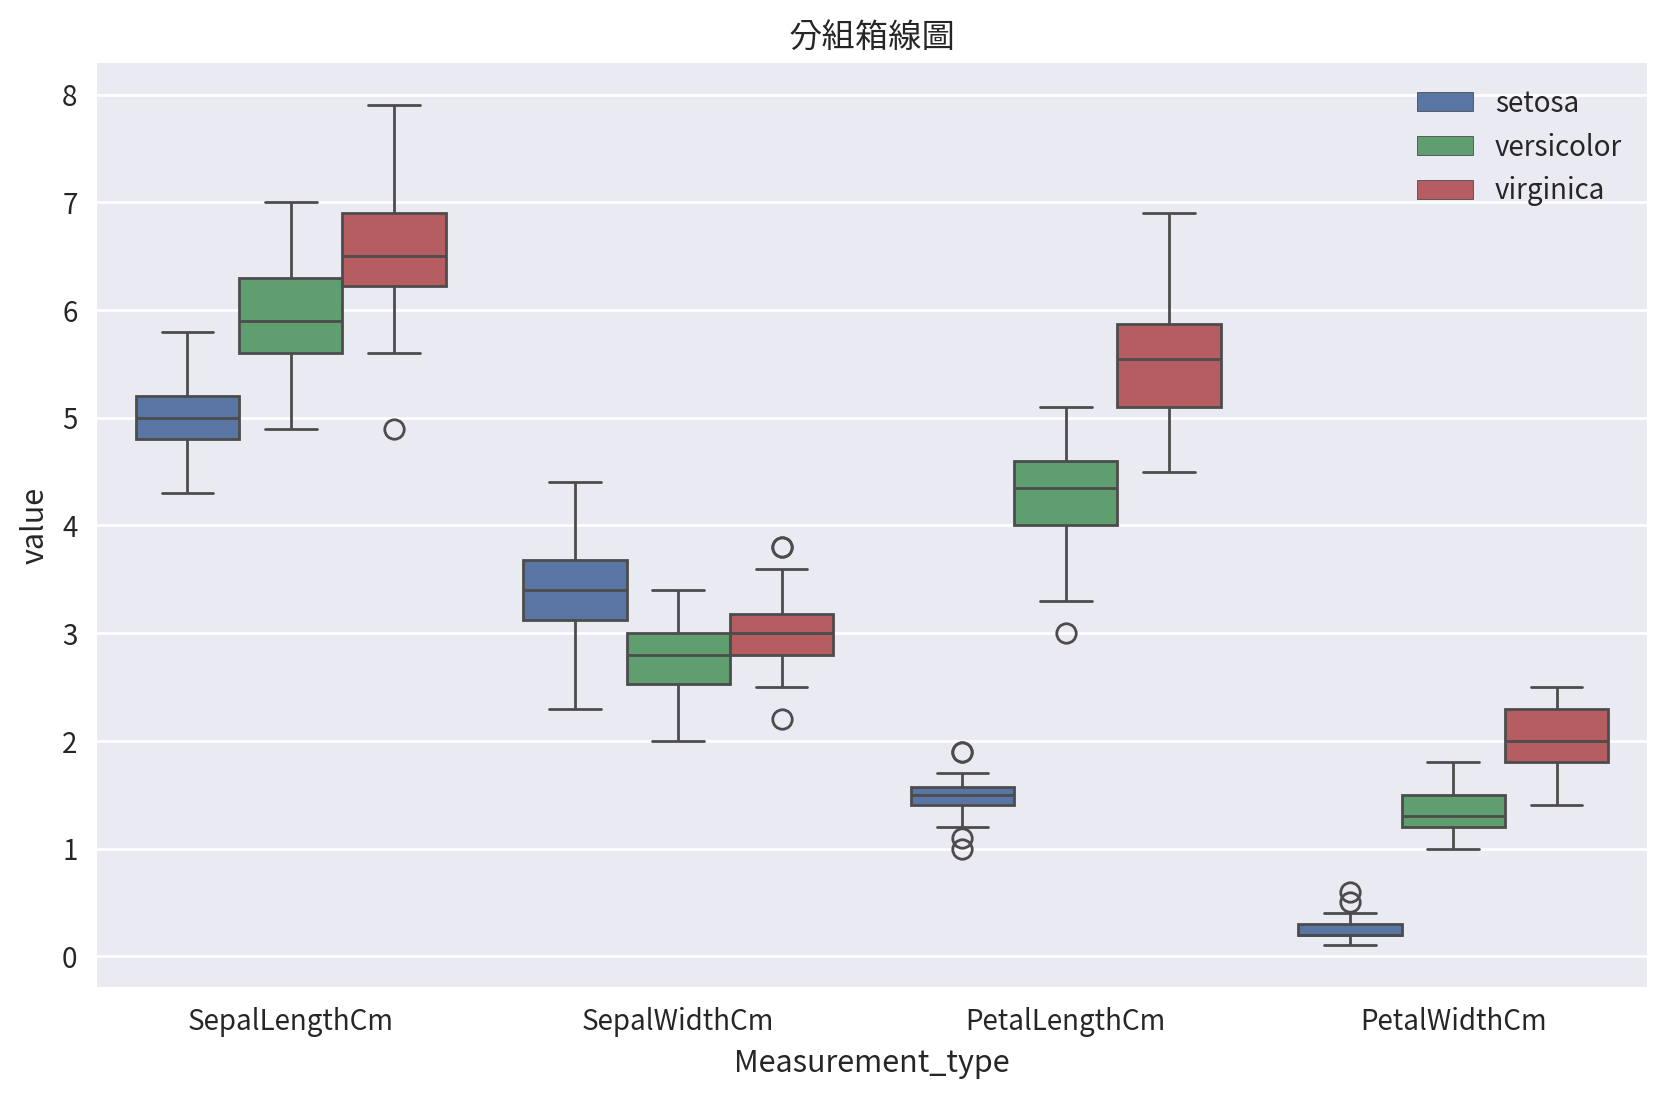

In [34]:
## 分組箱線圖

plt.figure(figsize=(10,6))

sns.boxplot(data=Irislong, x="Measurement_type",y="value", hue= "Species")

plt.legend(loc=1)

plt.title("分組箱線圖")

plt.show()


## **分類變數和連續變數的關係，二分類二連續**

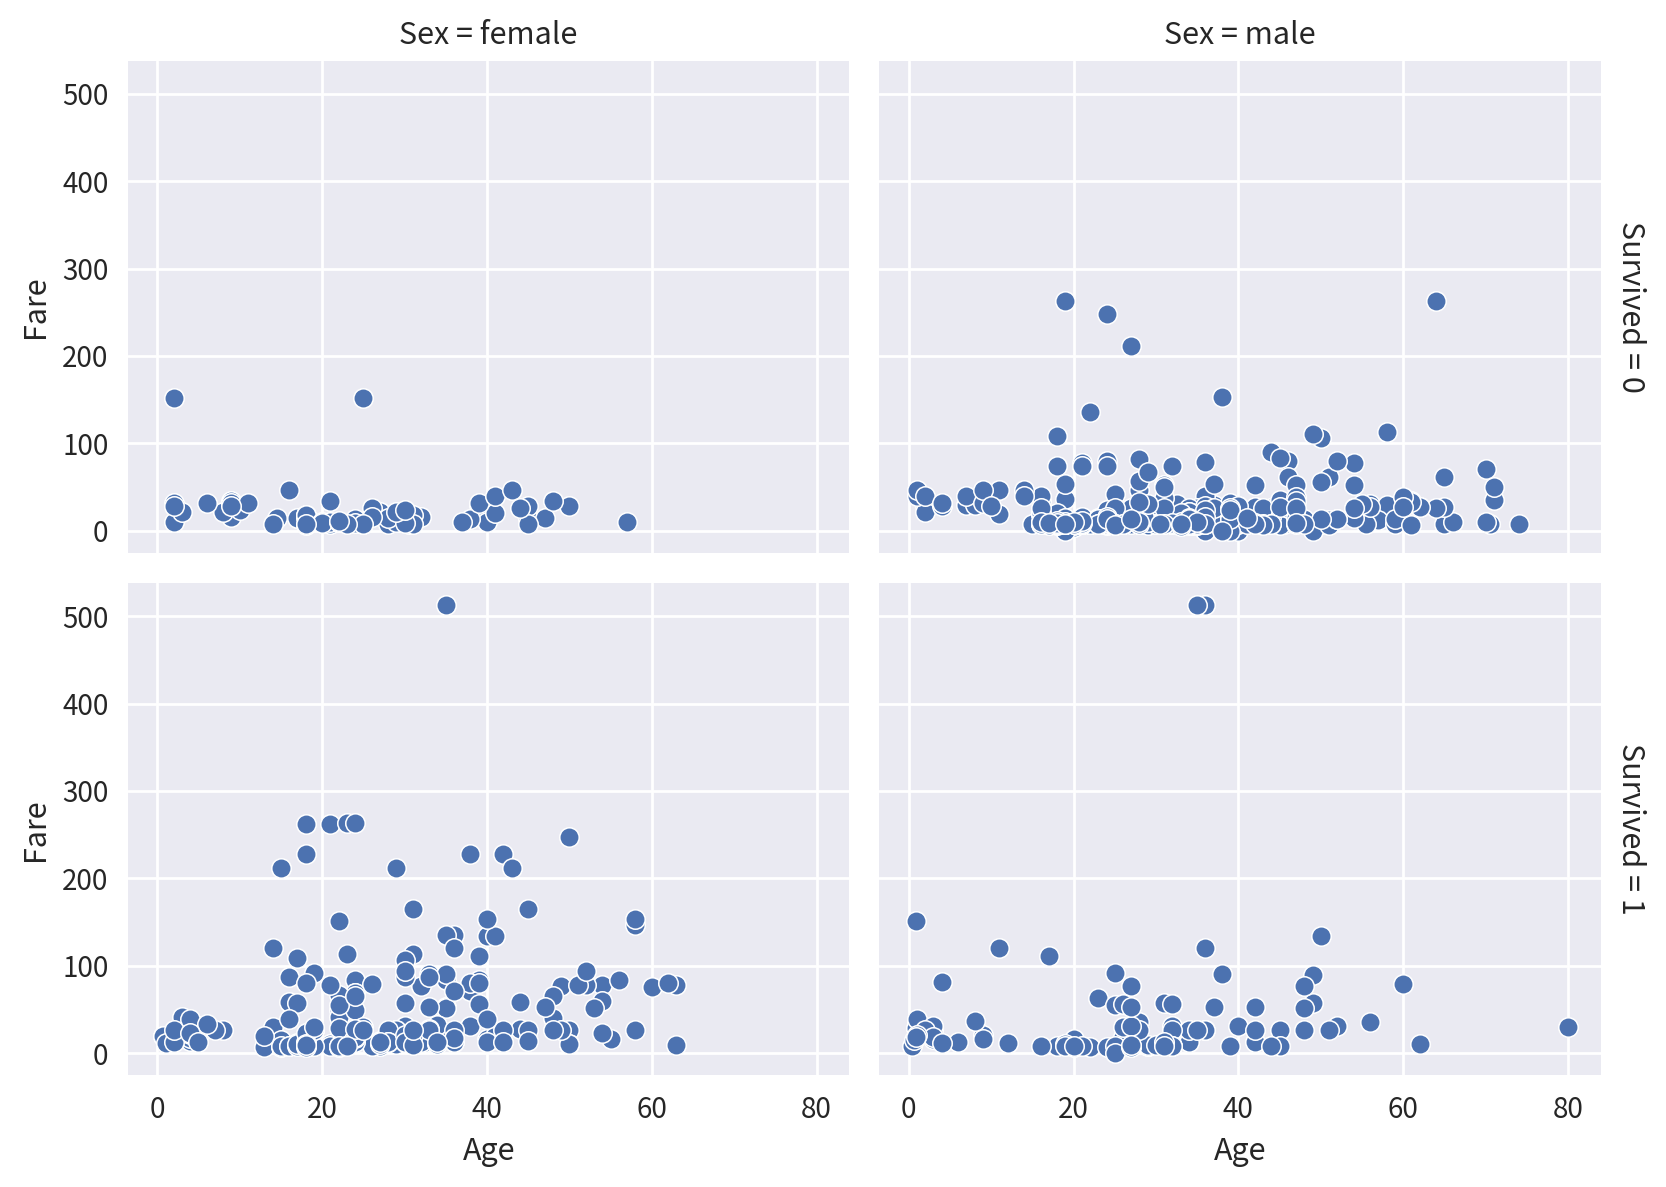

In [35]:
## 分面散點圖,設定網格分面

g=sns.FacetGrid(data=Titanic, row="Survived", col="Sex", margin_titles=True, height=3, aspect=1.4)

##增加散點圖

g.map(sns.scatterplot, "Age", "Fare",)

plt.show()


## **分類變數和連續變數的關係，一分類多連續**

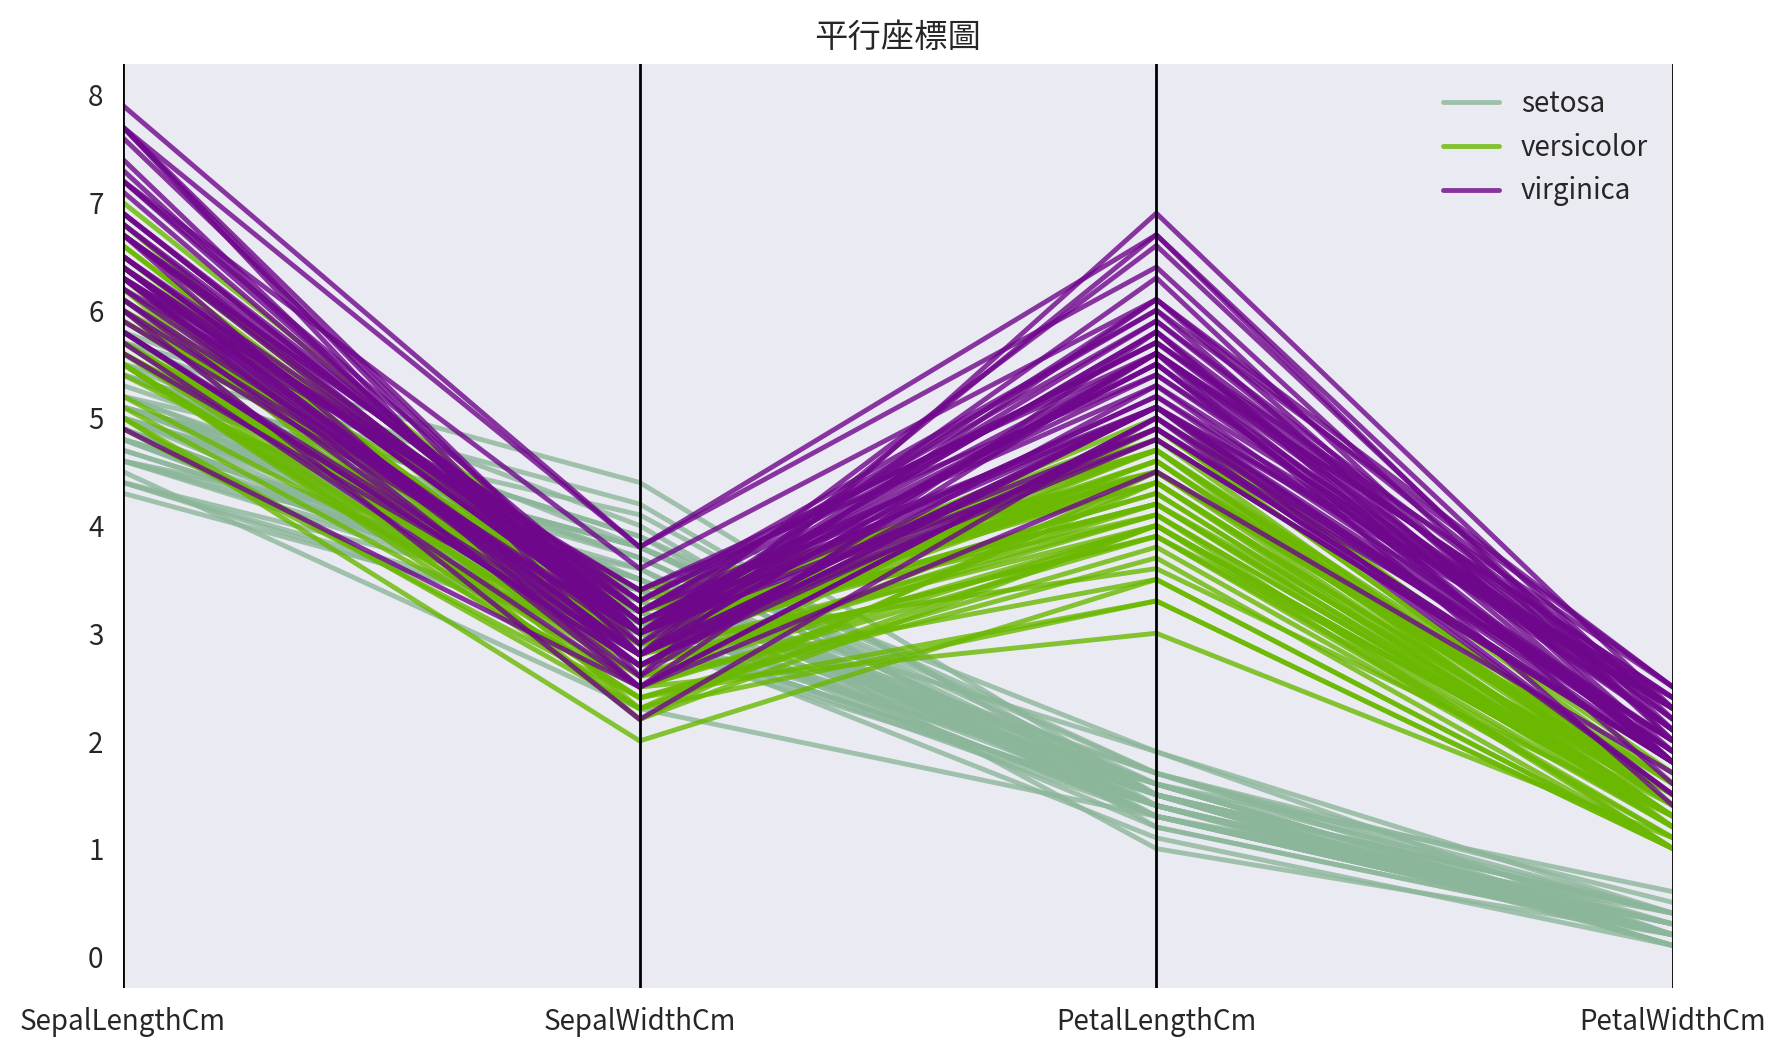

In [36]:
##平行座標圖

plt.figure(figsize=(10,6))

parallel_coordinates (Iris.iloc[:, 1:6], "Species", alpha=0.8)

plt.title("平行座標圖")

plt.show()


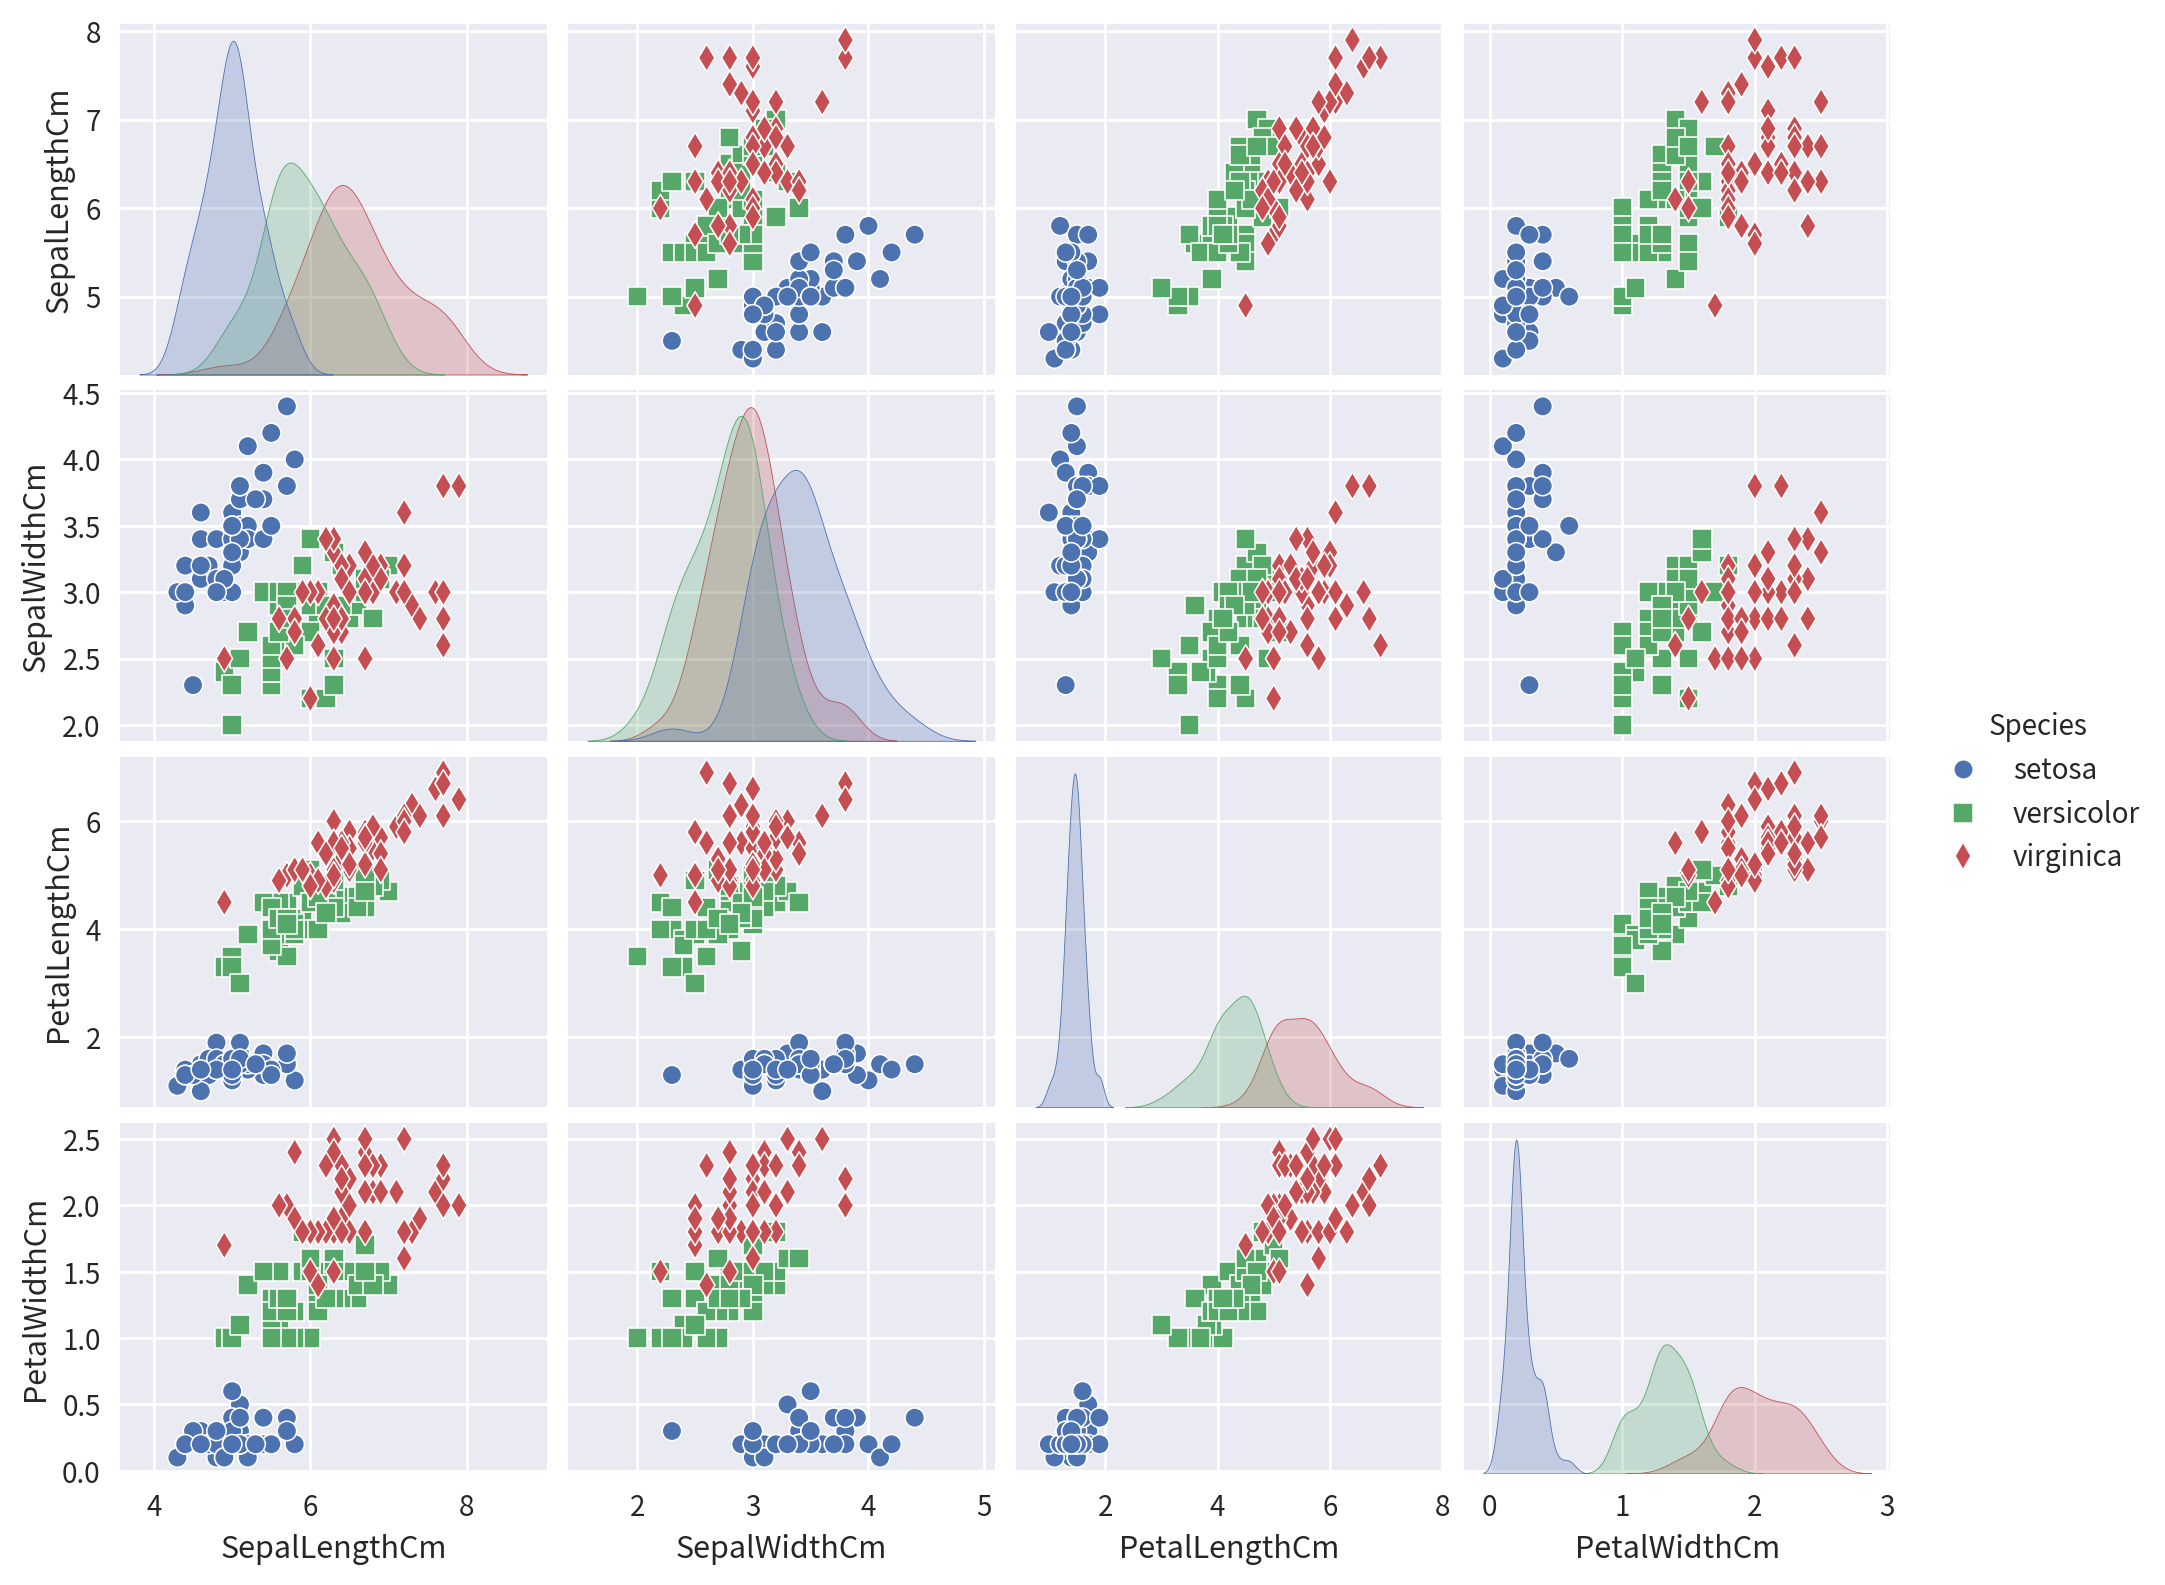

In [38]:
## 矩陣散點圖

sns.pairplot(Iris.iloc[:,1:6], hue="Species", height=2, aspect=1.2, diag_kind="kde", markers=["o", "s", "d"])

plt.show()


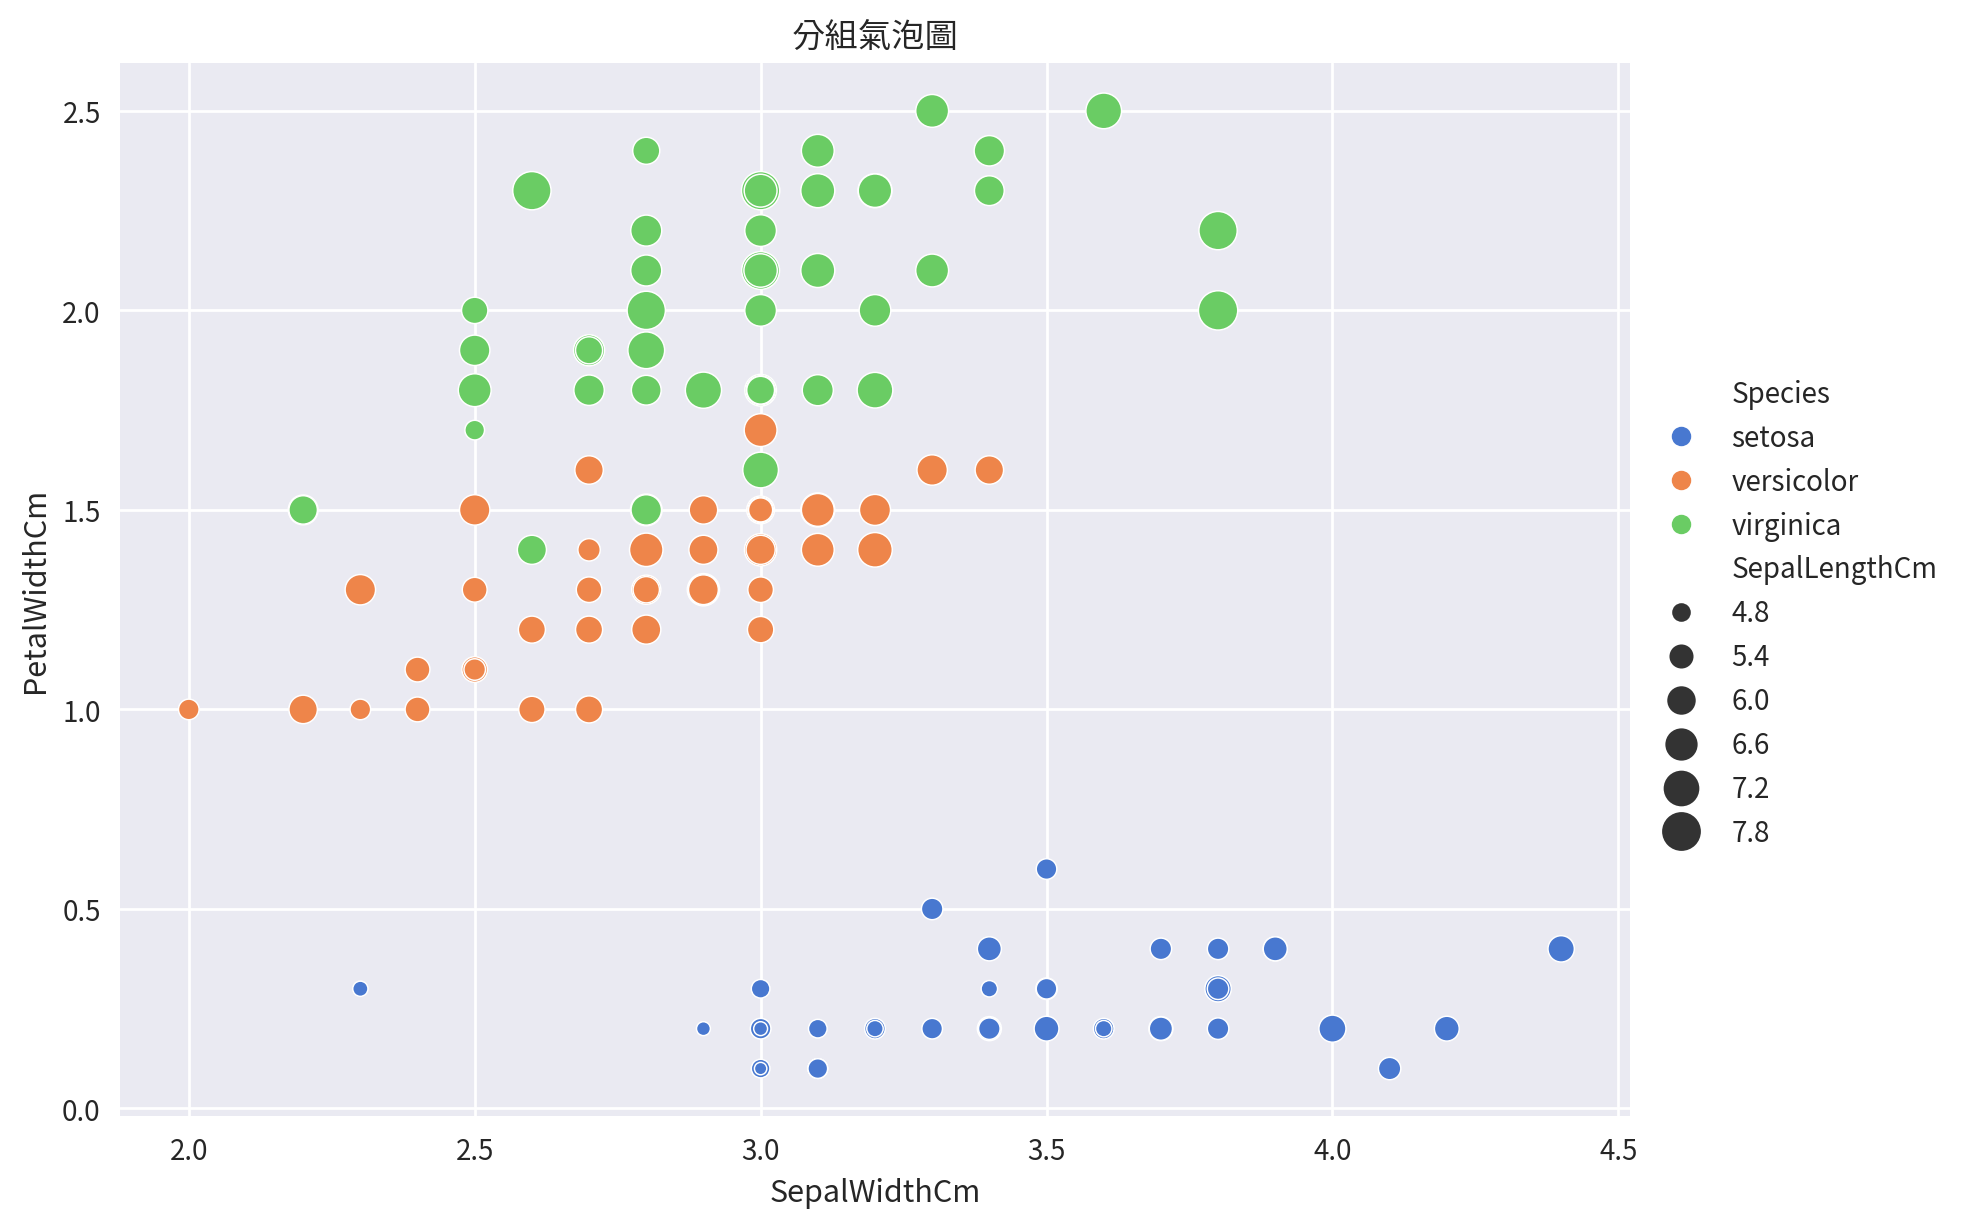

In [39]:
## 分組氣泡圖

sns.relplot(data=Iris, x="SepalWidthCm", y="PetalWidthCm", hue="Species", size="SepalLengthCm", sizes=(20,200), palette="muted", height=6, aspect=1.4)

plt.title("分組氣泡圖")

plt.show()


# **時間序列資料**

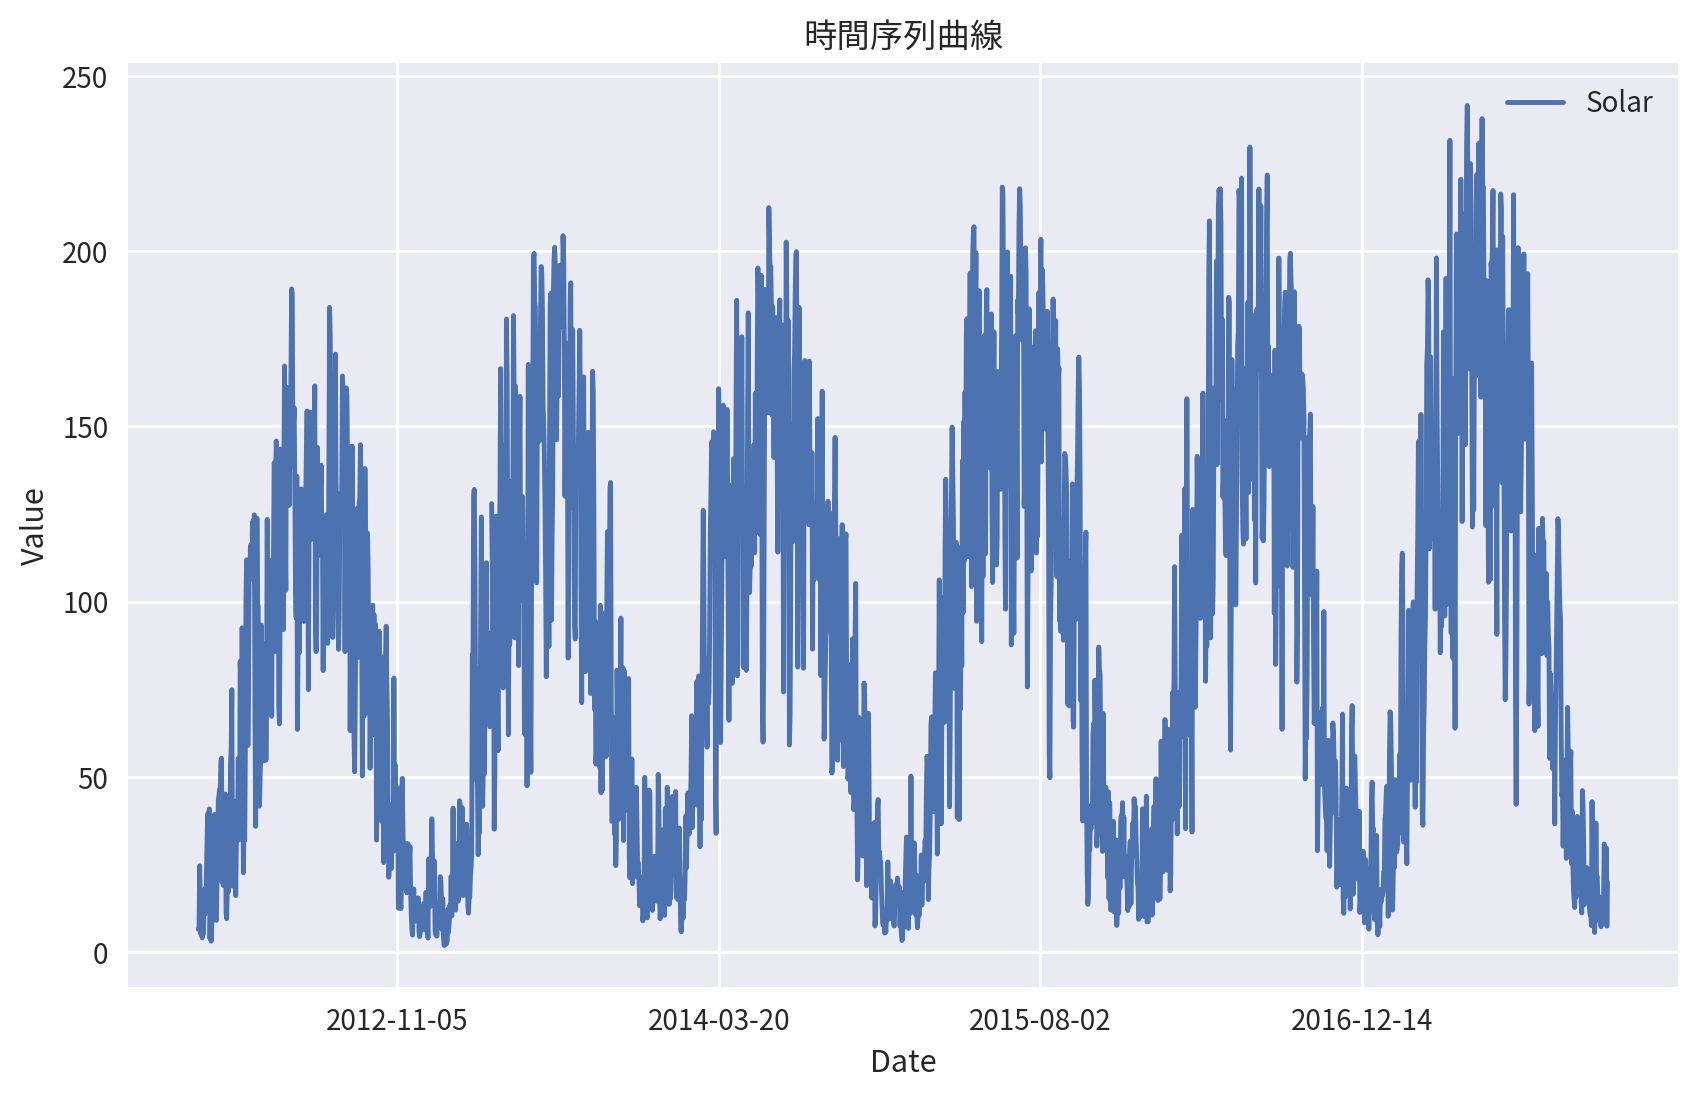

In [40]:
##時間序列資料

opsd=pd.read_csv("OpenPowerSystemData.csv")

##聚合線圖

opsd.plot(kind="line", x="Date", y="Solar", figsize=(10,6))

plt.ylabel("Value")

plt.title("時間序列曲線")

plt.show()


## **資料樣本間的距離**

In [43]:
datadf2=Iris.iloc[:,1:5]
print(datadf2.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


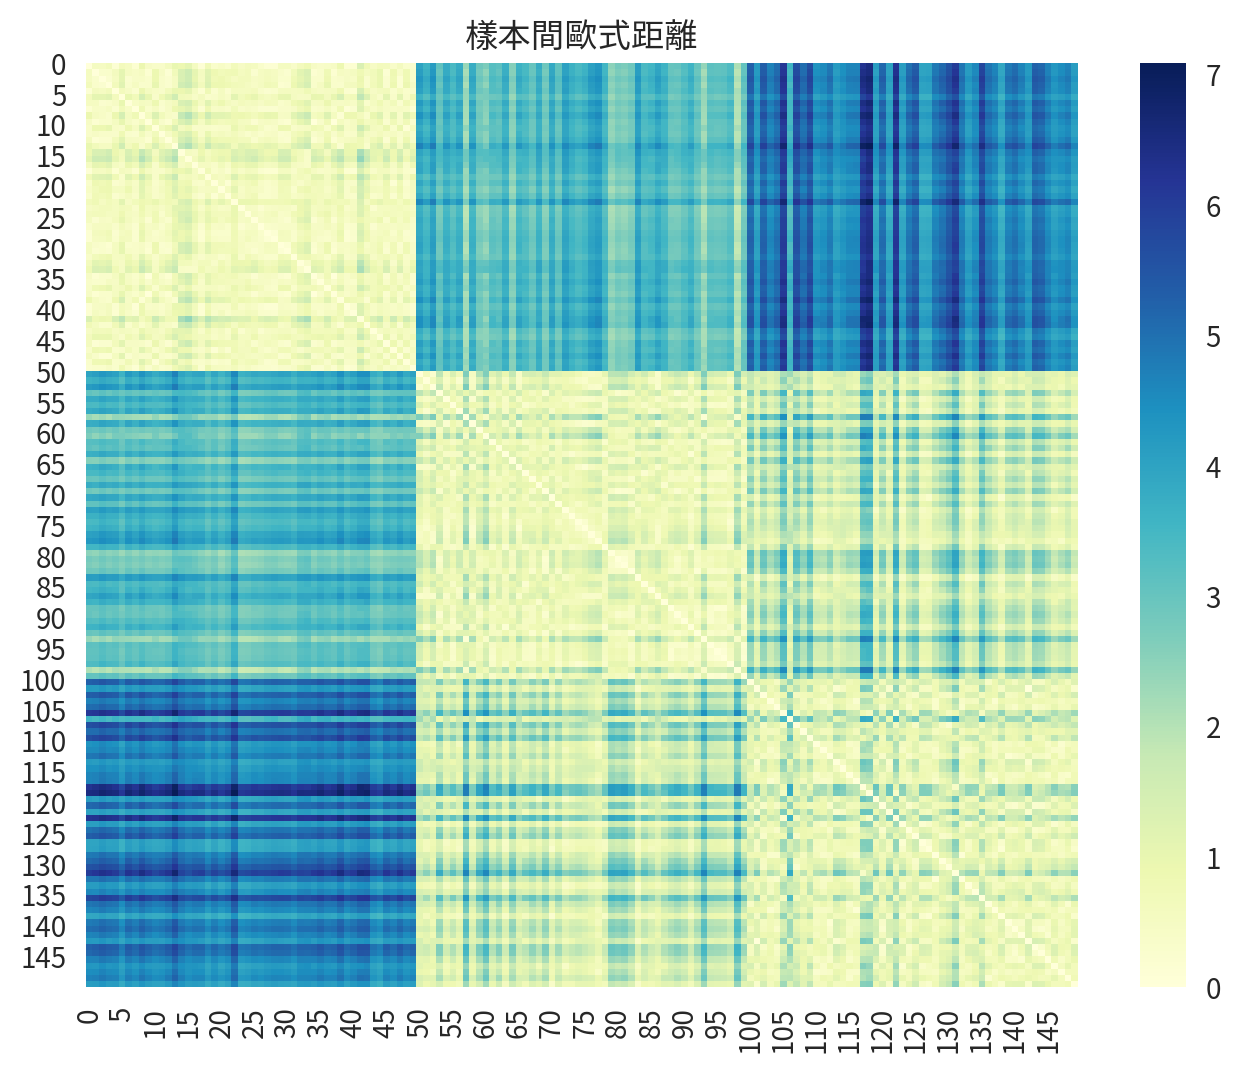

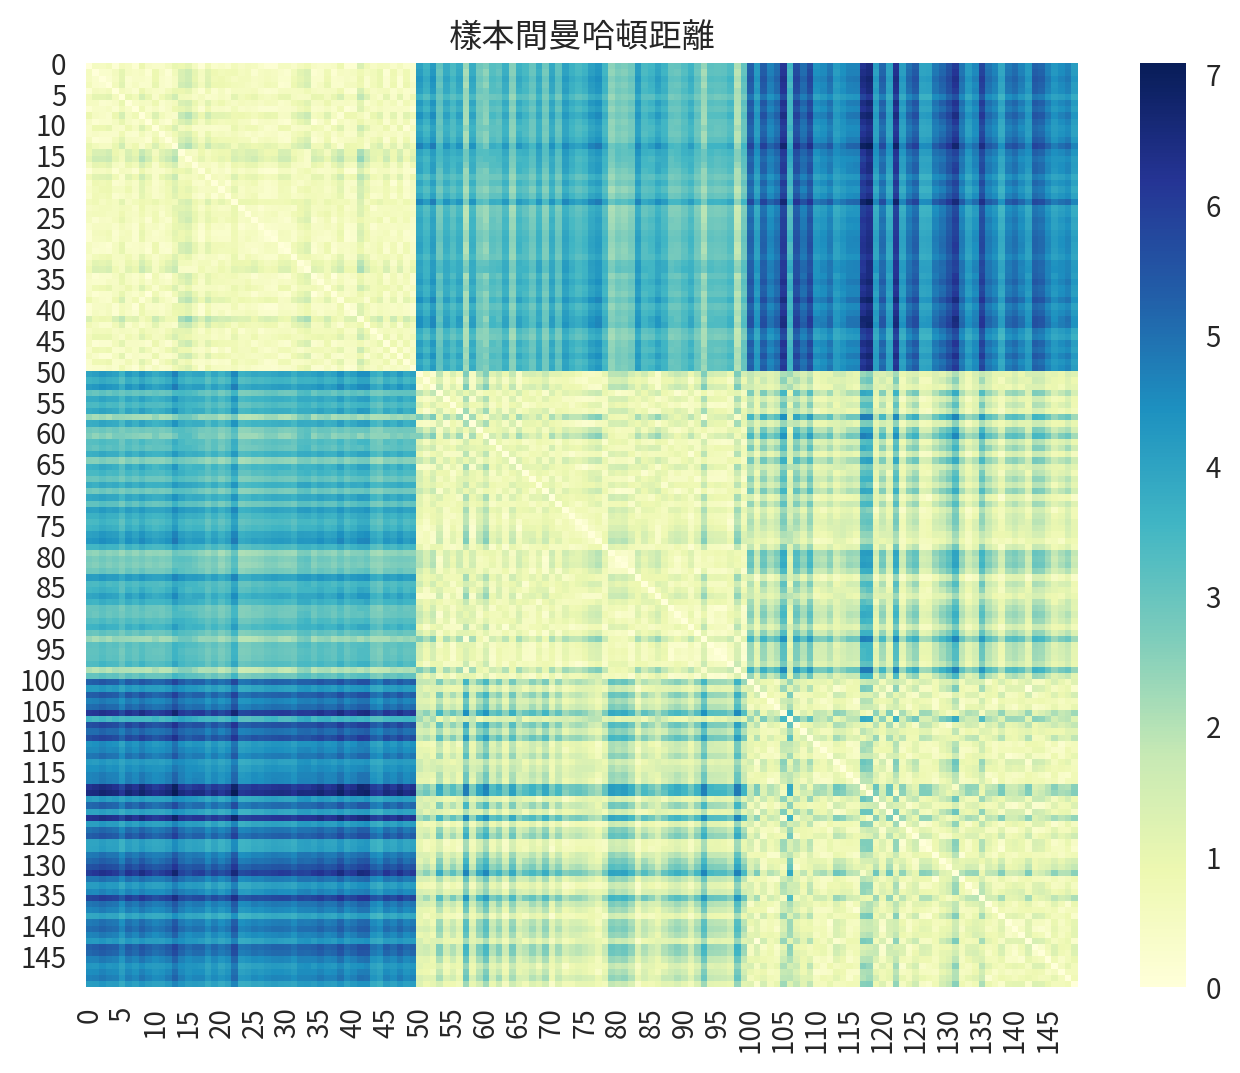

In [44]:
 ##計算樣本的距離

from scipy.spatial import distance

##歐式距離

dist=distance.cdist(datadf2, datadf2, "euclidean")

##使用熱力圖型視覺化樣本之間的距離

plt.figure(figsize=(8,6))

sns.heatmap(dist, cmap="YlGnBu")

plt.title("樣本間歐式距離")

plt.show()

## 曼哈頓距離

dist-distance.cdist(datadf2, datadf2, "cityblock")

## 使用熱力圖型視覺化樣本之間的距離

plt.figure(figsize=(8,6))

sns.heatmap(dist,cmap="YlGnBu")

plt.title("樣本間曼哈頓距離")

plt.show()


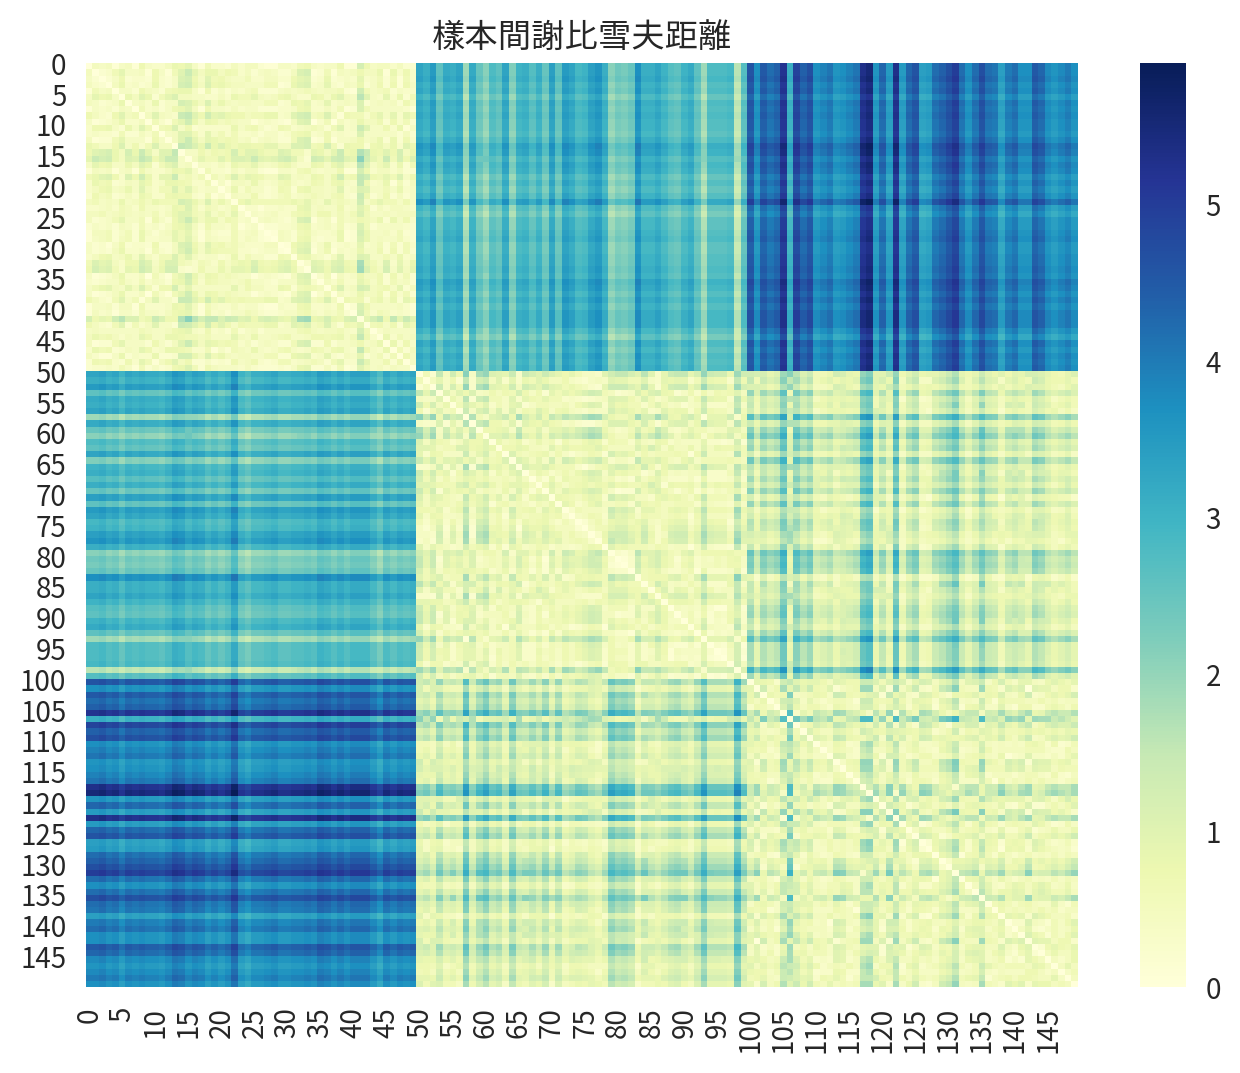

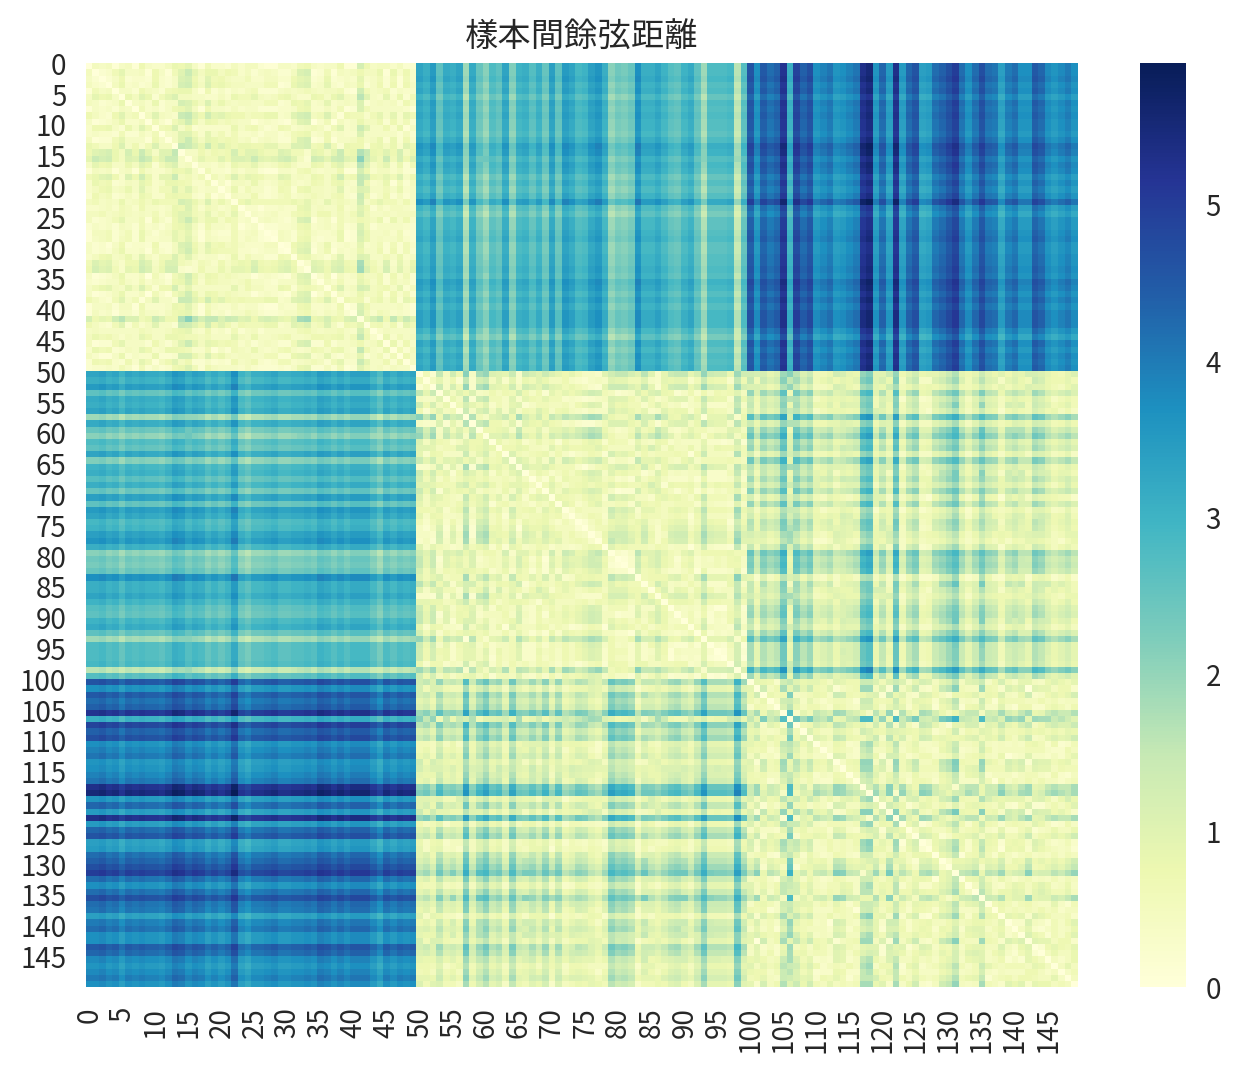

In [45]:
##謝比雪夫距離

dist=distance.cdist(datadf2, datadf2, "chebyshev")

##使用熱力圖型視覺化樣本之間的距離

plt.figure(figsize=(8,6))

sns.heatmap(dist, cmap="YlGnBu")

plt.title("樣本間謝比雪夫距離")

plt.show()

## 餘弦距離

dist-distance.cdist(datadf2, datadf2, "cosine")

## 使用熱力圖型視覺化樣本之間的距離

plt.figure(figsize=(8,6))

sns.heatmap(dist,cmap="YlGnBu")

plt.title("樣本間餘弦距離")

plt.show()

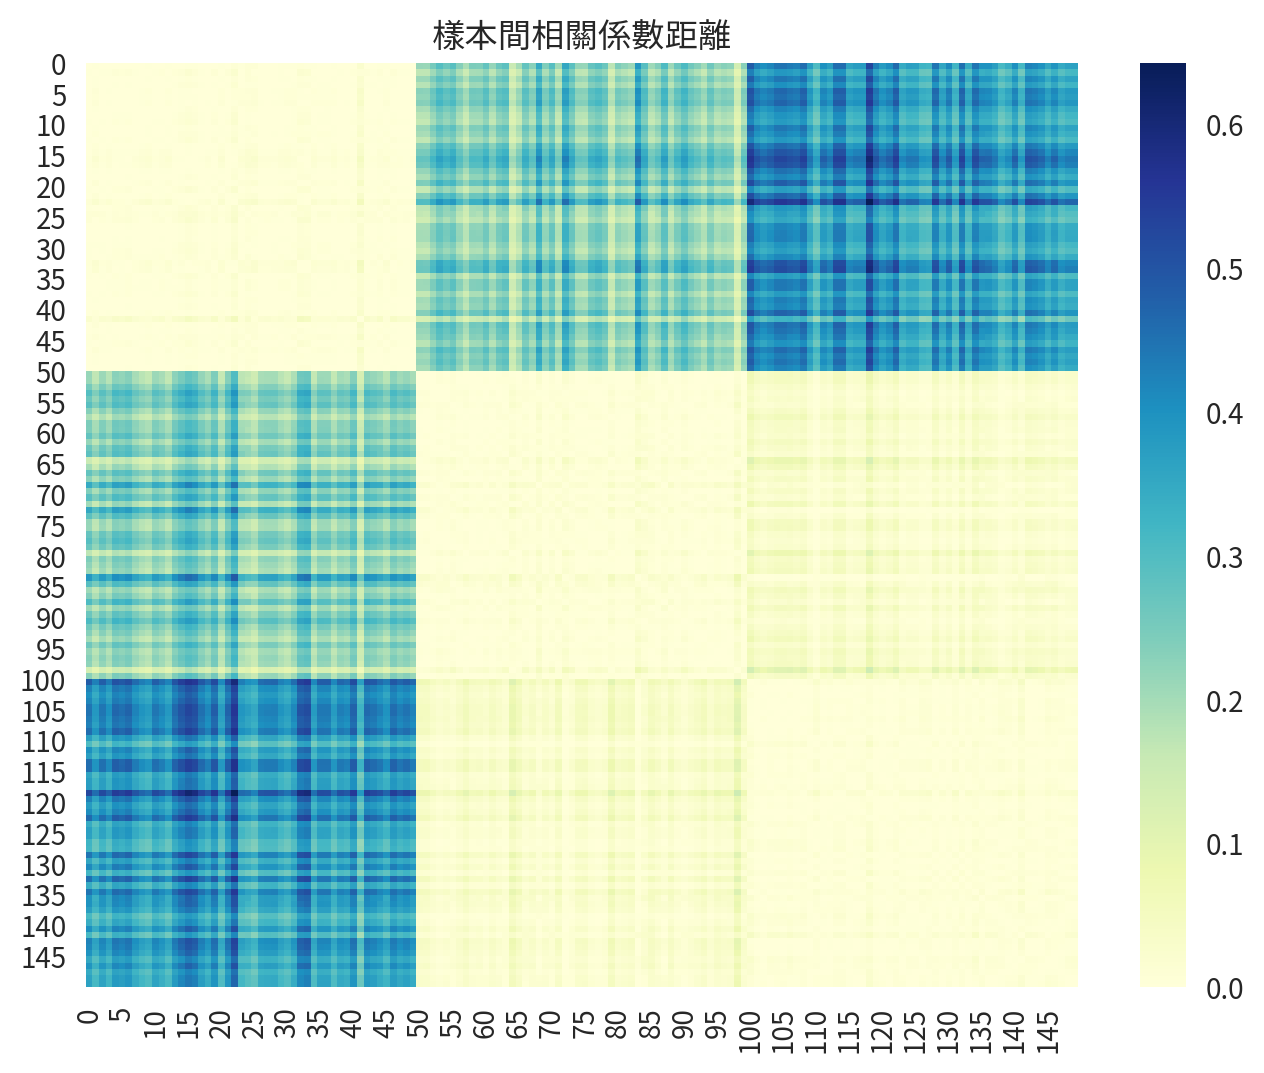

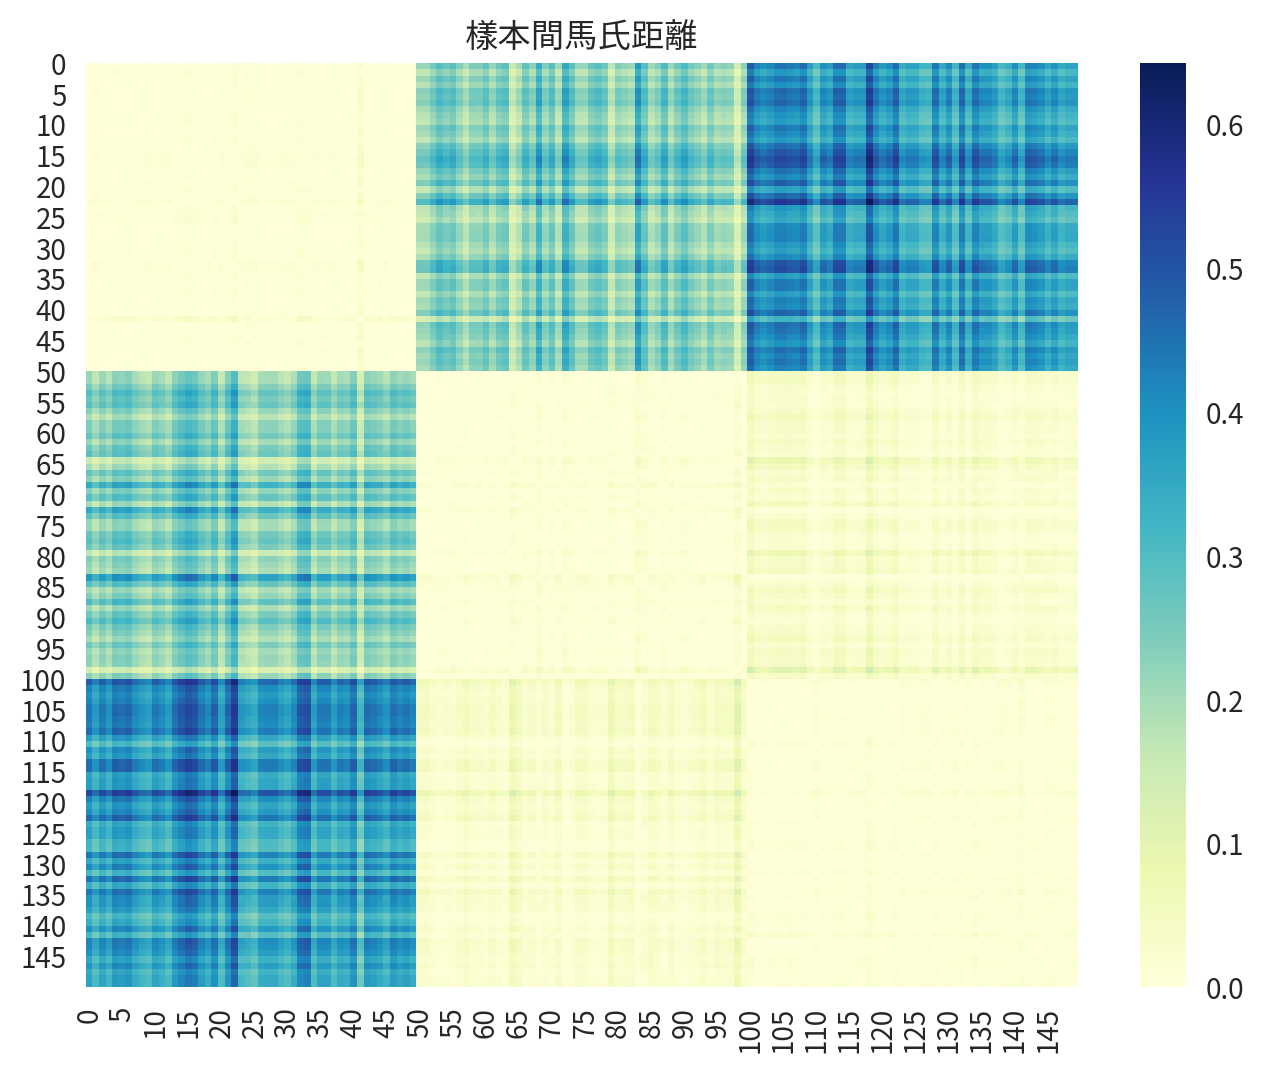

In [46]:
##相關係數距離

dist=distance.cdist(datadf2, datadf2, "correlation")

##使用熱力圖型視覺化樣本之間的距離

plt.figure(figsize=(8,6))

sns.heatmap(dist, cmap="YlGnBu")

plt.title("樣本間相關係數距離")

plt.show()

## 馬氏距離

dist-distance.cdist(datadf2, datadf2, "mahalanobis")

## 使用熱力圖型視覺化樣本之間的距離

plt.figure(figsize=(8,6))

sns.heatmap(dist,cmap="YlGnBu")

plt.title("樣本間馬氏距離")

plt.show()